___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [269]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix, roc_auc_score
from sklearn.metrics import make_scorer, average_precision_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

primary MOS: A United States military occupation code

In [270]:
# reading the ANSUR II MALE Public.csv file cheking the head of df_male

df_male =pd.read_csv("ANSUR II MALE Public.csv", encoding="unicode_escape")
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [271]:
# cheking the shape of df_male

df_male.shape

(4082, 108)

In [272]:
# reading the ANSUR II FEMALE Public.csv file cheking the head of df_female

df_female =pd.read_csv("ANSUR II FEMALE Public.csv", encoding="unicode_escape")
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [273]:
# cheking the shape of df_female

df_female.shape

(1986, 108)

In [274]:
# renaming the SubjectId column in df_female to be the same in the df_male

df_female.rename({"SubjectId":"subjectid"}, axis=1, inplace=True)

In [275]:
df_female.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [276]:
# joning df_male and df_female using concat method

df = pd.concat([df_male, df_female], ignore_index=True)  # ignore_index allows reindexing the merged data

In [277]:
# checking the shape of merged df

df.shape

(6068, 108)

## Explore Data

In [278]:
# checking the summary information of df

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [279]:
# checking the null values

df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [280]:
# Drop Ethnicity feature since it has so many null values

df.drop(columns="Ethnicity", inplace=True)

In [281]:
df.shape

(6068, 107)

In [282]:
# checking the duplicateds

df.duplicated().sum()

0

In [283]:
# checking the descriptive values of df numeric columns

df.describe()

subjectid  abdominalextensiondepthsitting  acromialheight  \
count    6068.00                         6068.00         6068.00   
mean    20757.20                          246.47         1406.16   
std     13159.39                           37.40           79.09   
min     10027.00                          155.00         1115.00   
25%     14841.75                          219.00         1350.00   
50%     20063.50                          242.00         1410.00   
75%     27234.50                          271.00         1462.00   
max    920103.00                          451.00         1683.00   

       acromionradialelength  anklecircumference  axillaheight  \
count                6068.00             6068.00       6068.00   
mean                  327.37              224.89       1299.61   
std                    20.72               16.05         72.02   
min                   249.00              156.00       1038.00   
25%                   313.00              214.00       1249.00   
50%                   328.00              225.00       1302.00   
75%                   341.25              235.00       1349.00   
max                   393.00              293.00       1553.00   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                  6068.00           6068.00            6068.00   
mean                    244.19            194.75             399.20   
std                      16.85             13.52              30.24   
min                     186.00            151.00             283.00   
25%                     232.00            185.00             376.00   
50%                     245.00            195.00             404.00   
75%                     256.00            204.00             421.00   
max                     306.00            245.00             489.00   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                    6068.00           6068.00           6068.00   
mean                      340.93            274.74            490.75   
std                        41.52             19.22             42.14   
min                       216.00            197.00            357.00   
25%                       311.00            262.00            460.00   
50%                       341.00            274.00            492.00   
75%                       370.00            288.00            520.00   
max                       490.00            362.00            637.00   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
count             6068.00           6068.00                    6068.00   
mean                72.25            324.90                     306.64   
std                  5.34             17.09                      20.79   
min                 55.00            267.00                     245.00   
25%                 68.00            314.00                     292.00   
50%                 72.00            326.00                     307.00   
75%                 76.00            336.00                     321.00   
max                 91.00            385.00                     390.00   

       bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
count             6068.00               6068.00       6068.00        6068.00   
mean               139.72               1020.08        241.62         870.15   
std                  7.31                 76.42         26.48          54.82   
min                116.00                737.00        168.00         656.00   
25%                135.00                968.00        222.00         832.00   
50%                140.00               1017.00        241.00         868.00   
75%                145.00               1068.00        259.00         906.25   
max                174.00               1341.00        349.00        1080.00   

       buttockkneelength  buttockpopliteallength  calfcircumference  \
count            6068.00                 6068.00   

In [284]:
# checking the descriptive values of df categorical columns

df.describe(include="O")

Gender       Date Installation     Component                  Branch  \
count    6068       6068         6068          6068                    6068   
unique      2        253           12             3                       3   
top      Male  27-Feb-12  Camp Shelby  Regular Army  Combat Service Support   
freq     4082         45         1160          3140                    3174   

       PrimaryMOS SubjectsBirthLocation WritingPreference  
count        6068                  6068              6068  
unique        285                   152                 3  
top           11B            California        Right hand  
freq          671                   446              5350

In [285]:
# comparing the values of SubjectNumericRace and DODRace columns whether they are similar

df[["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
31                  3           112
4                   4           108
51                  1            99
8                   2            94
21                  2            51
31                  1            47
6                   6            37
23                  2            26
41                  4            26
28                  2            25
51                  5            24
6                   4            21
41                  1            19
251                 2            18
5                   5            16
61                  1            15
3                   1            13
25                  2            13
18                  1            12
61                  6            12
8                   1            11
                    4            10
21                  1             9
61                  4             8


In [286]:
# checking the value counts of SubjectNumericRace column

df.SubjectNumericRace.value_counts().sort_index()

1        3561
2        1026
3         541
4         109
5          18
6          59
8         116
18         18
21         60
23         34
25         14
28         26
31        160
35          8
38          9
41         46
42          7
43          5
48          1
51        126
61         35
62          8
63          7
64          8
218         3
231         6
235         4
238         1
251        20
318         2
351        10
358         1
423         2
425         1
428         1
431         2
451         2
631         1
641         2
651         2
2351        2
2518        2
4251        1
42351       1
Name: SubjectNumericRace, dtype: int64

In [287]:
# checking the value counts of DODRace column

df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [288]:
df[df.SubjectNumericRace == df.DODRace][["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
4                   4           108
6                   6            37
5                   5            16
dtype: int64

In [289]:
# features will be dropped as a result of above analysis

# Date (there isn't any contribution of Date column on the prediction of target label)
# Installation (there isn't any contribution of Installation column on the prediction of target label)
# subjectid (there isn't any contribution of subjectid column on the prediction of target label)
# Weightlbs = weightkg, so Weightlbs column will be drop
# Heightin = stature, so Heightin column will be drop
# SubjectNumericRace will be drop and DODRace will be used as a target label
# PrimaryMOS (there isn't any contribution of PrimaryMOS column on the prediction of target label)


df.drop(columns=["Date","Installation", "subjectid","Weightlbs","Heightin","SubjectNumericRace", "PrimaryMOS"], inplace=True)

In [290]:
# checking the shape of df after dropping

df.shape

(6068, 100)

In [292]:
# checking the value counts fo DODRace

df["DODRace"].value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

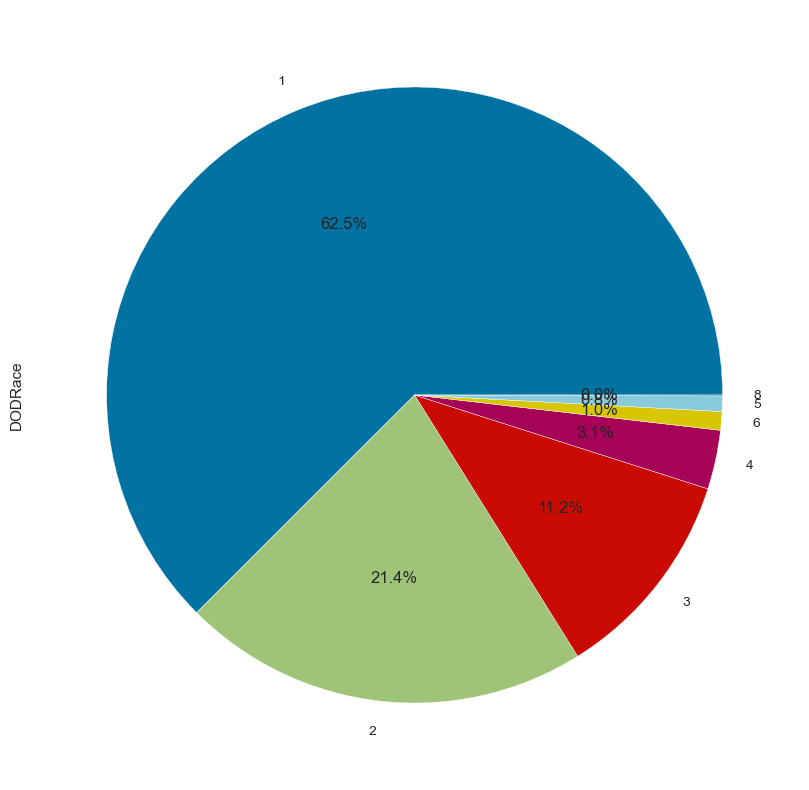

In [293]:
# pie plot for DODRace feature

df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

In [294]:
# Changing the DODRace values with related labels

df["DODRace"] = df.DODRace.map({1: "White",
                                2: "Black",
                                3: "Hispanic",
                                4: "Asian",
                                5: "Native American",
                                6: "Pacific Islander",
                                8: "Other"})

In [295]:
# dropping DODRace values whose value counts are less than 500, because model will not be learn from insufficient data

(df.DODRace.value_counts() < 500)

White               False
Black               False
Hispanic            False
Asian                True
Pacific Islander     True
Native American      True
Other                True
Name: DODRace, dtype: bool

In [296]:
df.drop(index=df.loc[df.DODRace.isin(["Asian","Pacific Islander","Native American","Other"])].index, inplace=True)

In [297]:
df.shape

(5769, 100)

In [298]:
# Checking the number of unique values of object columns

df.select_dtypes(include="O").nunique()

Gender                     2
Component                  3
Branch                     3
SubjectsBirthLocation    136
DODRace                    3
WritingPreference          3
dtype: int64

In [299]:
# checking the correlation of df numerical features

df.corr()

abdominalextensiondepthsitting  \
abdominalextensiondepthsitting                            1.00   
acromialheight                                            0.35   
acromionradialelength                                     0.31   
anklecircumference                                        0.52   
axillaheight                                              0.28   
balloffootcircumference                                   0.46   
balloffootlength                                          0.33   
biacromialbreadth                                         0.42   
bicepscircumferenceflexed                                 0.69   
bicristalbreadth                                          0.51   
bideltoidbreadth                                          0.72   
bimalleolarbreadth                                        0.37   
bitragionchinarc                                          0.53   
bitragionsubmandibulararc                                 0.63   
bizygomaticbreadth                                        0.52   
buttockcircumference                                      0.74   
buttockdepth                                              0.84   
buttockheight                                             0.25   
buttockkneelength                                         0.48   
buttockpopliteallength                                    0.32   
calfcircumference                                         0.66   
cervicaleheight                                           0.34   
chestbreadth                                              0.63   
chestcircumference                                        0.83   
chestdepth                                                0.78   
chestheight                                               0.30   
crotchheight                                              0.19   
crotchlengthomphalion                                     0.46   
crotchlengthposterioromphalion                            0.20   
earbreadth                                                0.24   
earlength                                                 0.40   
earprotrusion                                             0.14   
elbowrestheight                                           0.26   
eyeheightsitting                                          0.28   
footbreadthhorizontal                                     0.44   
footlength                                                0.35   
forearmcenterofgriplength                                 0.35   
forearmcircumferenceflexed                                0.63   
forearmforearmbreadth                                     0.73   
forearmhandlength                                         0.31   
functionalleglength                                       0.42   
handbreadth                                               0.42   
handcircumference                                         0.46   
handlength                                                0.30   
headbreadth                                               0.36   
headcircumference                                         0.36   
headlength                                                0.33   
heelanklecircumference                                    0.50   
heelbreadth                                               0.44   
hipbreadth                                                0.60   
hipbreadthsitting                                         0.55   
iliocristaleheight                                        0.26   
interpupillarybreadth                                     0.26   
interscyei                                                0.60   
interscyeii                                               0.54   
kneeheightmidpatella                                      0.28   
kneeheightsitting                                         0.35   
lateralfemoralepicondyleheight                            0.22   
lateralmalleolusheight                                    0.35   
lowerthighcircumference                                   0.67   
menton

In [300]:
# define a function to check multicolinarity

def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (59, 59)


In [301]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [302]:
df.shape

(5769, 100)

In [303]:
# check the highly correlated features

df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(20)

Corr
abdominalextensiondepthsitting abdominalextensiondepthsitting  1.00
cervicaleheight                stature                         0.99
stature                        suprasternaleheight             0.99
cervicaleheight                suprasternaleheight             0.99
acromialheight                 axillaheight                    0.99
                               suprasternaleheight             0.98
                               cervicaleheight                 0.98
eyeheightsitting               sittingheight                   0.98
axillaheight                   suprasternaleheight             0.98
acromialheight                 stature                         0.98
axillaheight                   cervicaleheight                 0.98
                               stature                         0.98
neckcircumference              neckcircumferencebase           0.97
acromionradialelength          shoulderelbowlength             0.97
chestheight                    suprasternaleheight             0.97
cervicaleheight                chestheight                     0.97
buttockheight                  trochanterionheight             0.97
chestheight                    stature                         0.96
iliocristaleheight             tenthribheight                  0.96
forearmcenterofgriplength      forearmhandlength               0.96

In [304]:
# define numerical and categorical features

df_numeric = df.select_dtypes('number')
df_object = df.select_dtypes('O')

df_numeric.shape, df_object.shape

((5769, 94), (5769, 6))

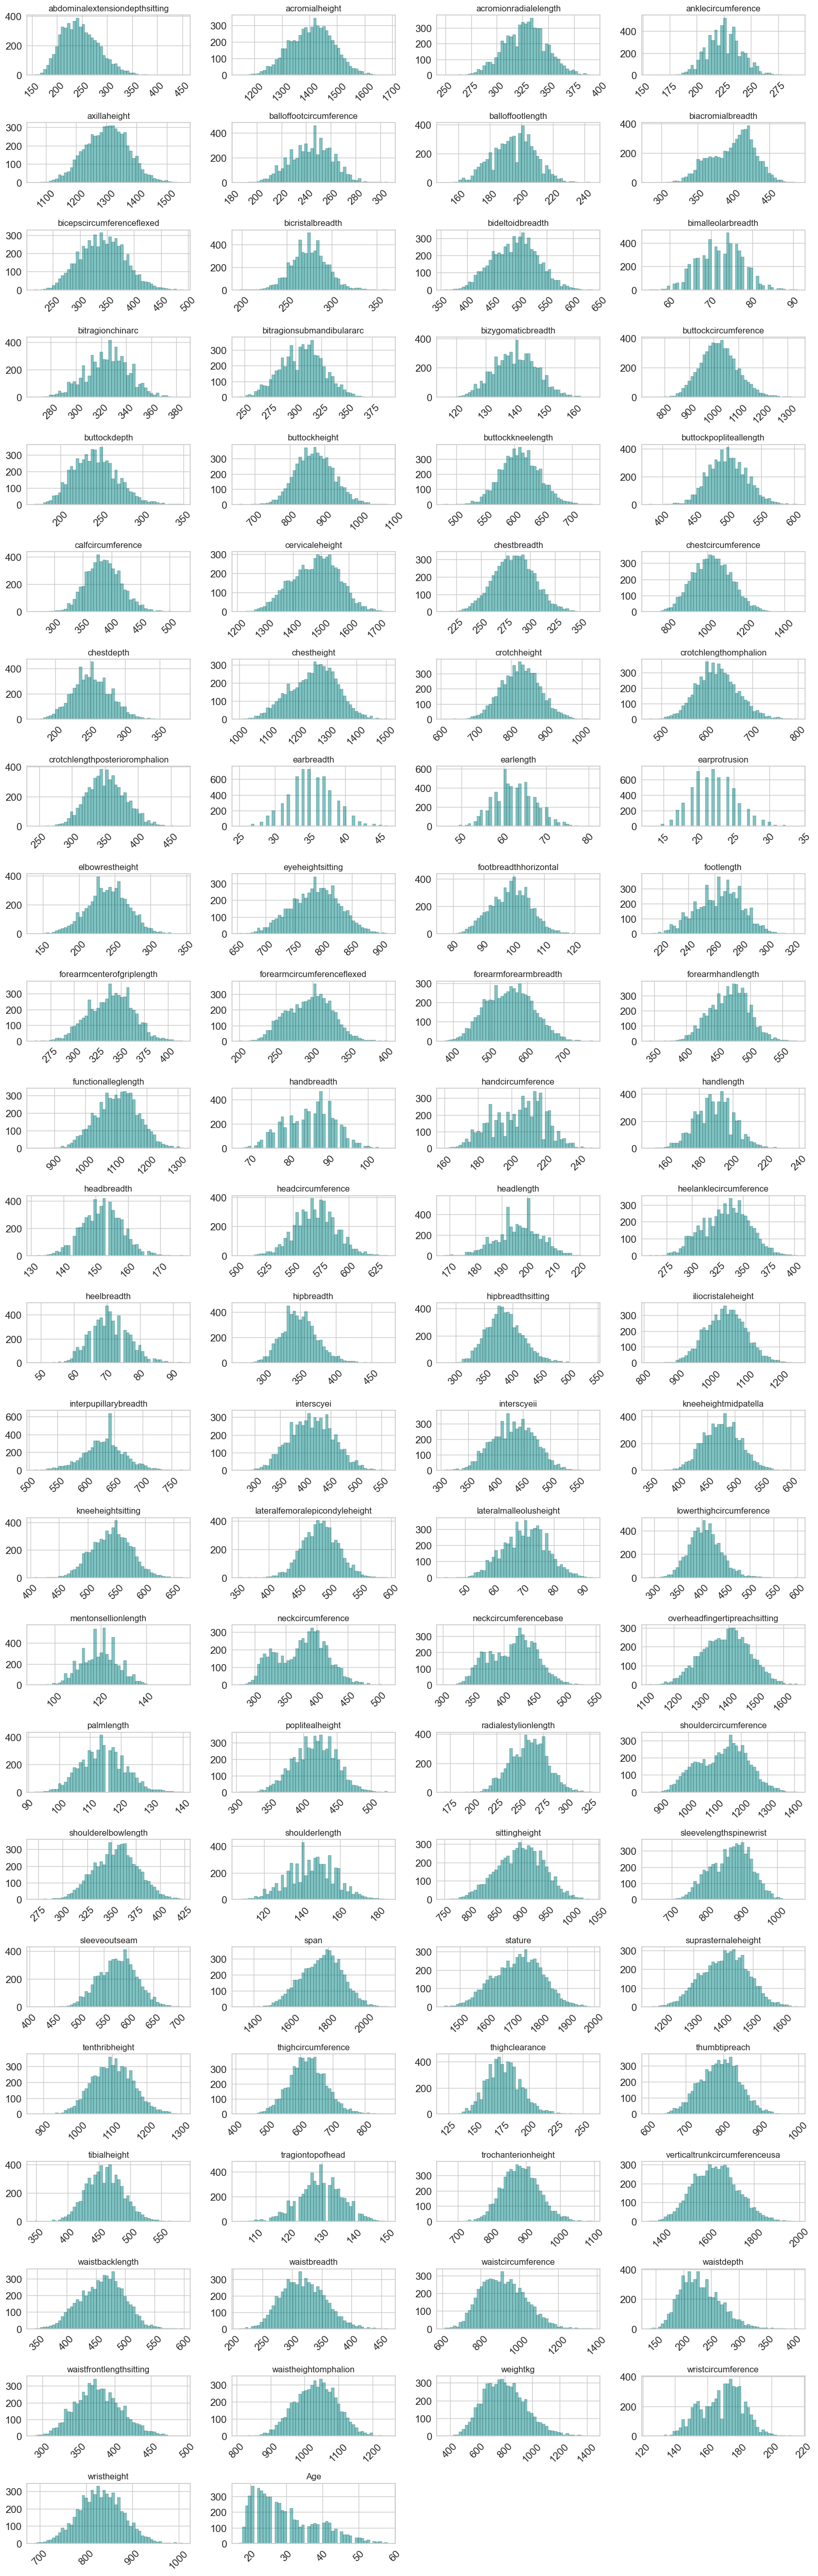

In [305]:
# histplot for numerical features

fig = df_numeric.hist(
figsize=(16, 50), layout=(int(np.ceil(len(df_numeric.columns)/4)), 4),
bins=50, color="darkcyan", 
edgecolor="black", 
xlabelsize=14, ylabelsize=14, 
alpha=0.5, xrot=45
)
plt.tight_layout()
plt.show()

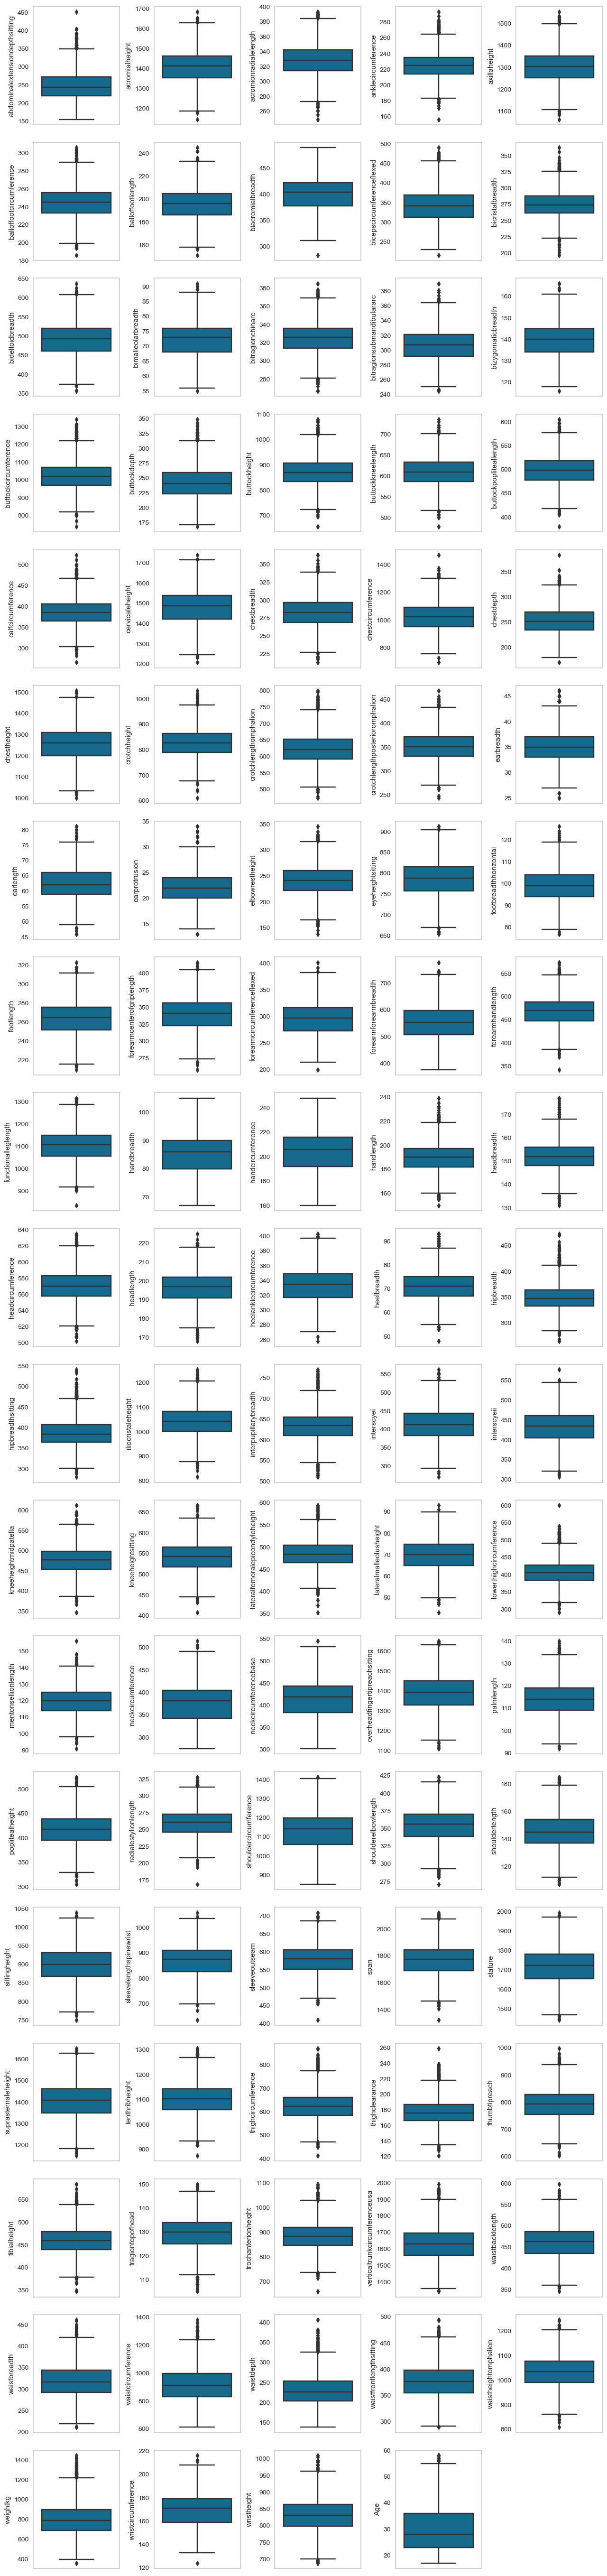

In [306]:
# boxplot for numerical features

fig = plt.figure(figsize=(15, 30))
plt.subplots_adjust(
    left=0.1, right=0.9,
    top=1.9, bottom=0.1,
    wspace=0.4, hspace=0.15
)
for i, col in enumerate(df_numeric.columns):
    plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
    sns.boxplot(y=col, data=df_numeric);

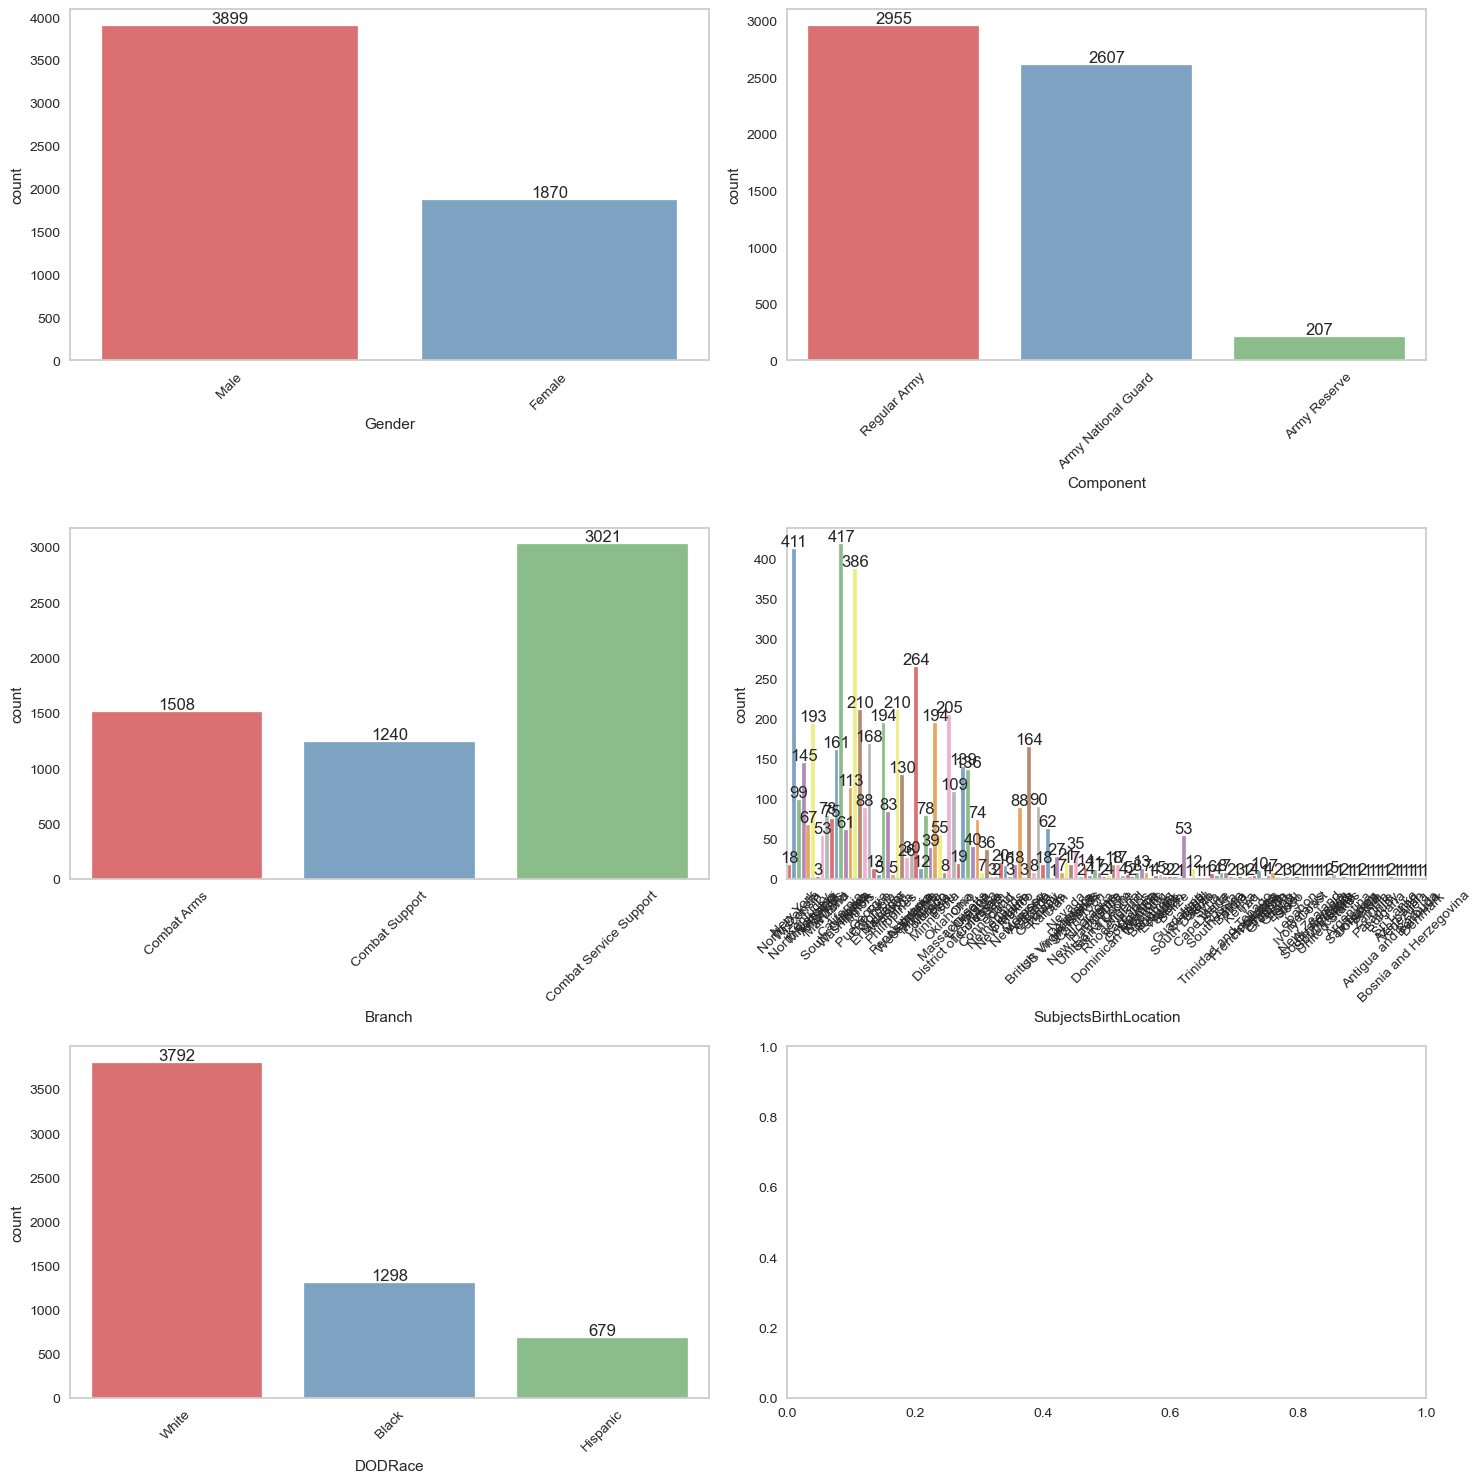

In [307]:
# countplot for categorical features

fig, axes = plt.subplots(int(np.ceil(len(df_object.columns)/2)), 2, figsize=(15, 15))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature skip target
    if i < len(df_object.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        g = sns.countplot(x=df_object.columns[i], alpha=0.7, data=df_object, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout();

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

## Train-Test split

In [308]:
# defining the X(independent variables) and y(dependent variable)

X = df.drop(columns="DODRace")
y = df["DODRace"]

In [309]:
# grab categorical columns' names for futhher analysis

cat = X.select_dtypes("object").columns
cat

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object')

In [310]:
# splitting the X and y as train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [311]:
# checking the shape of train and test data

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4615, 99), (1154, 99), (4615,), (1154,))

## OneHotEncoding and MinMax scaling using make_column_transformer

In [312]:
# define column transformer object to apply onehotencoding and scaling on data

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())  # apply onehot encoding on categorical features, then apply minmax scaler on remaining features

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [313]:
# define a function to compare evaluation metrics of models

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);

In [314]:
# built a pipe model for Logistic Regression

operations = [("OneHotEncoder", column_trans), ("log_model", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

log_pipe_model = Pipeline(steps=operations)

In [315]:
# fit the logistic regression model on train data

log_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.53      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



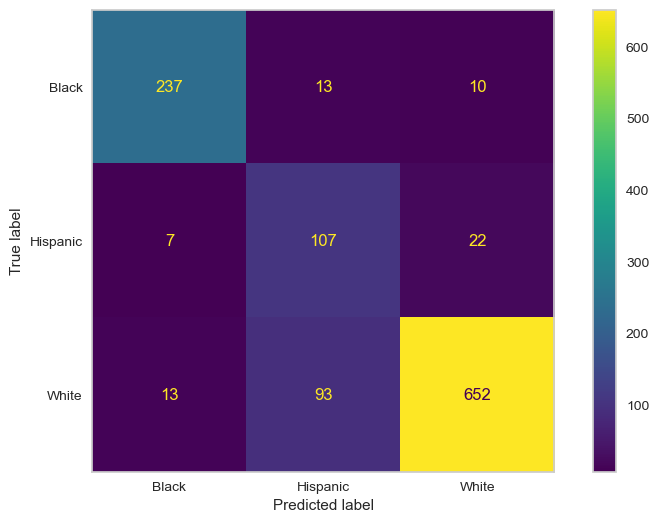

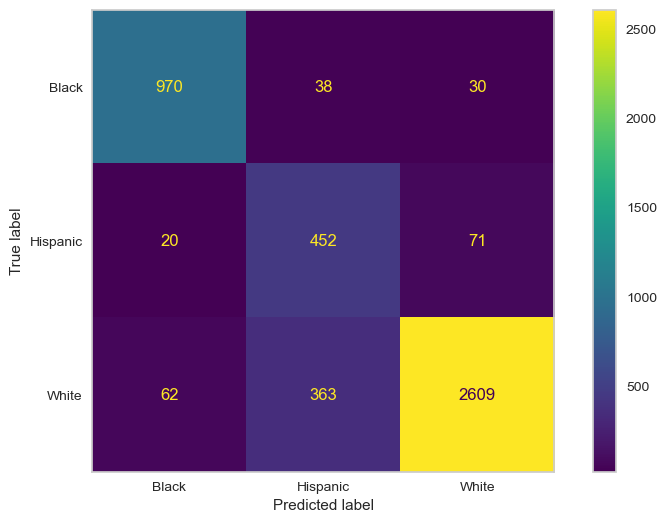

In [316]:
# check the evaluation metrics of logistic model

eval_metric(log_pipe_model, X_train, y_train, X_test, y_test)

#### Define Scoring to determine Hispanic correctly

In [317]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

### Logistic Model Cross Validation

In [318]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.60
test_precision_Hispanic   0.49
test_recall_Hispanic      0.77
dtype: float64

### Logistic Model GridsearchCV

In [319]:
# Defining gridsearch scoring parameter to maximize recall values of Hispancs'

recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [320]:
# reset the pipe model
model = Pipeline(operations)

# defining the grid parameter
penalty = ["l1", "l2"]
C = np.logspace(-1, 2, 4)
solver = ['liblinear', 'lbfgs']

param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__solver" : solver}

# built Logistic grid model
log_grid_model = GridSearchCV(model, param_grid = param_grid, scoring=recall_Hispanic, cv=5, n_jobs=-1)

In [321]:
# fit grid model on train data

log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([  0.1,   1. ,  10. , 100. ]),
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [322]:
log_grid_model.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [323]:
log_grid_model.best_params_

{'log_model__C': 1.0, 'log_model__penalty': 'l2', 'log_model__solver': 'lbfgs'}

In [324]:
log_grid_model.best_score_

0.7733095480801903

TEST REPORT
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.93      0.93      1038
    Hispanic       0.53      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



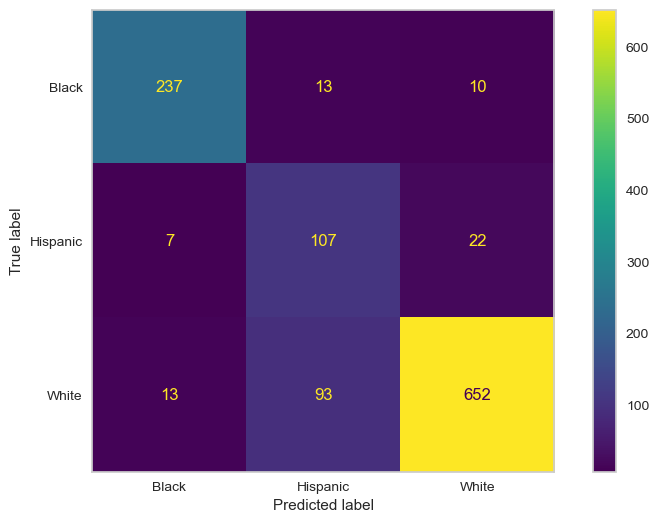

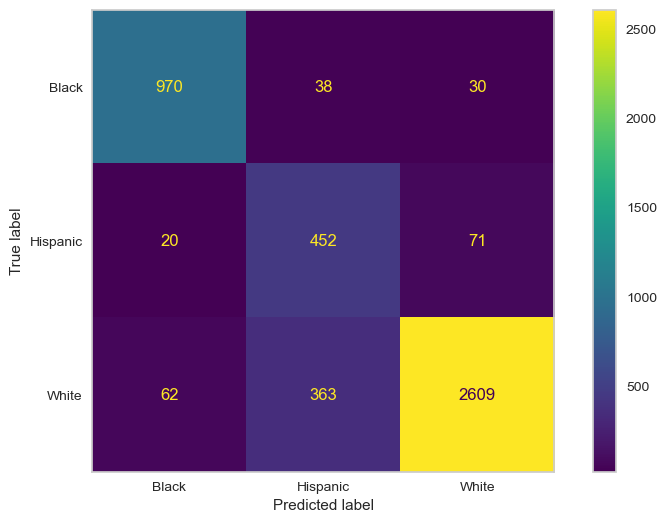

In [325]:
# checking the evaluation metrics of grid model

eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curves

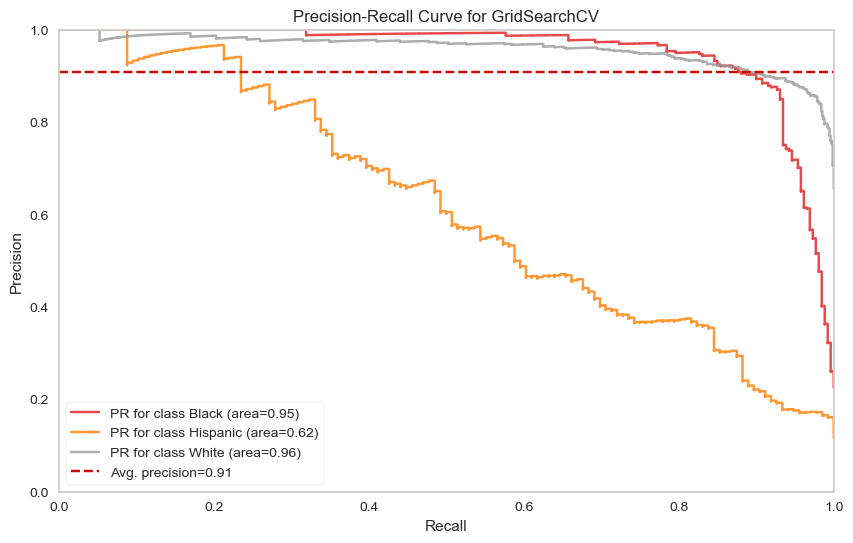

In [326]:
# precision-recall curve for Logistic grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = log_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes=["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [327]:
# predict on train and test data

y_pred_test = log_grid_model.predict(X_test)
y_pred_train = log_grid_model.predict(X_train)

In [328]:
# define model comparison variables

log_AP = viz.score_["Hispanic"] # AP: average precision

log_f1_test = f1_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
log_f1_train = f1_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

log_recall_test = recall_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
log_recall_train = recall_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

log_AP, log_f1_test, log_f1_train, log_recall_test, log_recall_train

(0.617182446657989,
 array([0.61318052]),
 array([0.64756447]),
 array([0.78676471]),
 array([0.83241252]))

## 2. SVC

### Vanilla SVC model 

In [329]:
# built SVC pipe model

operations = [("OneHotEncoder", column_trans), ("log_model", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

svc_pipe_model = Pipeline(steps=operations)

In [330]:
# fit the SVC pipe model on train data

svc_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('log_model',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.46      0.77      0.58       136
       White       0.95      0.85      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1038
    Hispanic       0.50      0.83      0.63       543
       White       0.96      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



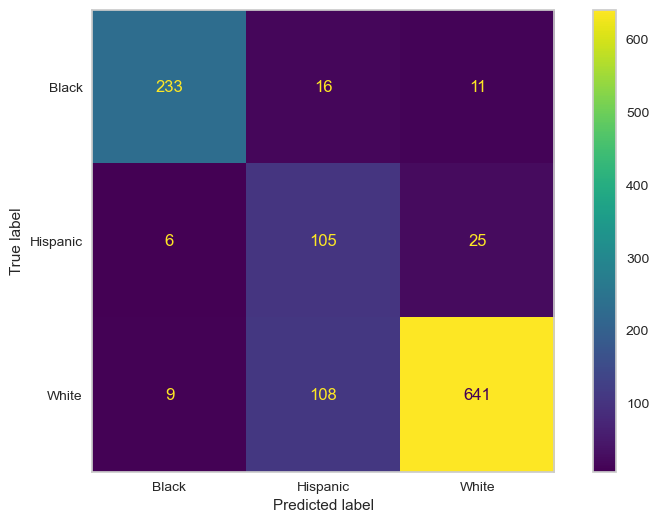

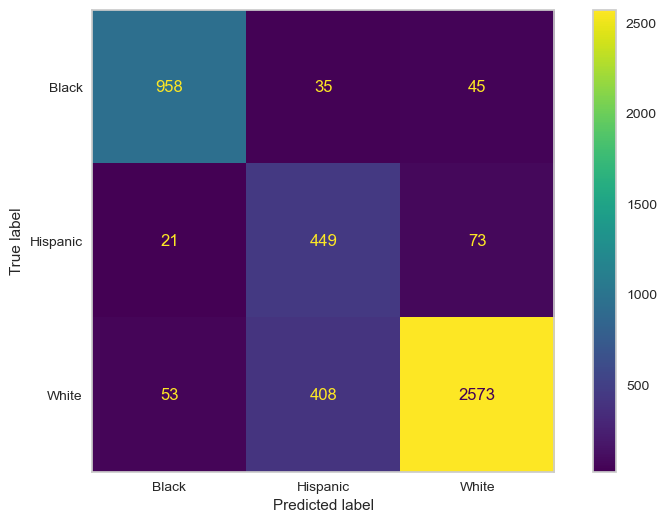

In [331]:
# check the evaluation metrics of SVC pipe model

eval_metric(svc_pipe_model, X_train, y_train, X_test, y_test)

### SVC Model Cross validation

In [332]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.57
test_precision_Hispanic   0.47
test_recall_Hispanic      0.76
dtype: float64

###  SVC Model GridsearchCV

In [333]:
operations = [("OneHotEncoder", column_trans), ("SVC", SVC(class_weight='balanced', random_state=42))]

# reset the pipe model
model = Pipeline(operations)

# defining the grid parameter
param_grid = {'SVC__C': [0.1, 1, 5],
              'SVC__gamma': ["scale", "auto", 1, 0.1]
             }

# built SVC grid model
SVC_grid_model = GridSearchCV(model, param_grid = param_grid, scoring=recall_Hispanic, cv=5, n_jobs=-1)

In [334]:
# fit grid model on train data

SVC_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.1, 1, 5],
                         'SVC__gamma': ['scale', 'auto', 1, 0.1]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [335]:
SVC_grid_model.best_params_

{'SVC__C': 5, 'SVC__gamma': 'auto'}

TEST REPORT
              precision    recall  f1-score   support

       Black       0.93      0.88      0.90       260
    Hispanic       0.44      0.76      0.56       136
       White       0.95      0.84      0.89       758

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.78      1154
weighted avg       0.88      0.84      0.85      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91      1038
    Hispanic       0.45      0.80      0.57       543
       White       0.95      0.82      0.88      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.88      0.84      0.85      4615



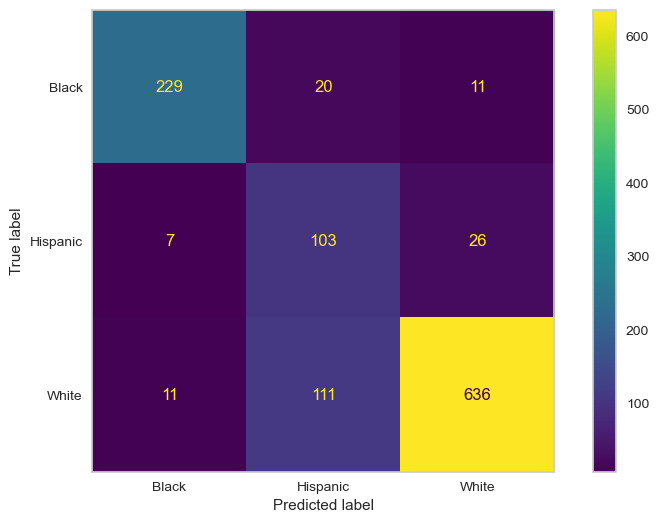

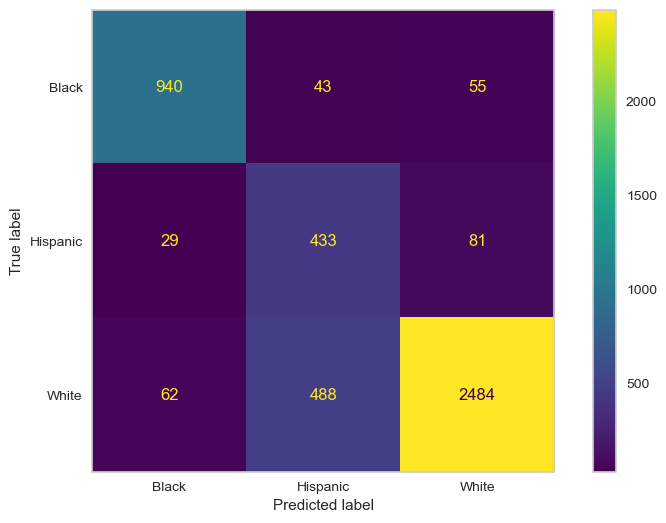

In [336]:
# checking the evaluation metrics of grid model

eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curves

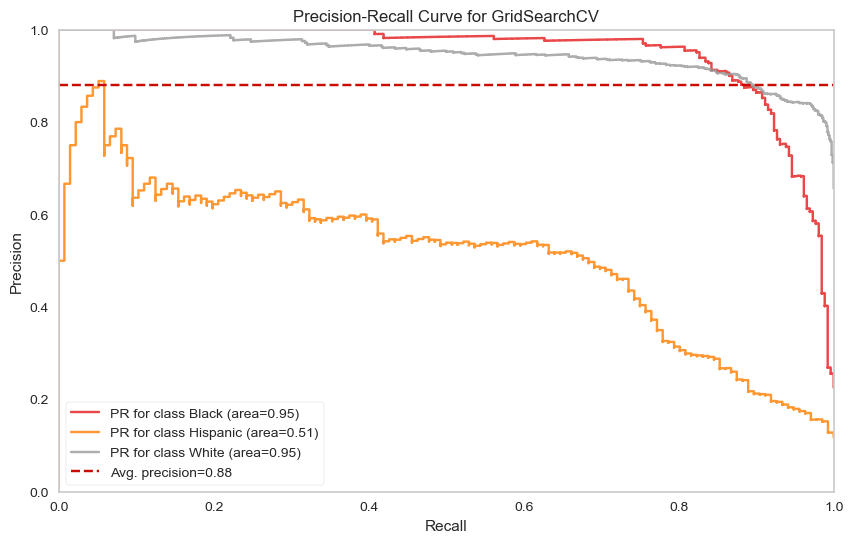

In [337]:
# precision-recall curve for SVC grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = SVC_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes=["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [338]:
# predict on train and test data

y_pred_test = SVC_grid_model.predict(X_test)
y_pred_train = SVC_grid_model.predict(X_train)

In [339]:
# define model comparison variables

SVC_AP = viz.score_["Hispanic"] # AP: average precision

SVC_f1_test = f1_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
SVC_f1_train = f1_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

SVC_recall_test = recall_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
SVC_recall_train = recall_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

SVC_AP, SVC_f1_test, SVC_f1_train, SVC_recall_test, SVC_recall_train

(0.5112261287965737,
 array([0.55675676]),
 array([0.57465163]),
 array([0.75735294]),
 array([0.79742173]))

## 3. DT

## Ordinal Encoding and MinMax scaling using make_column_transformer

In [340]:
# Get categorical columns name to use in ordinal encoding

cat = X_train.select_dtypes("object").columns
cat

Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object')

In [341]:
# built make_column_transformer

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) 

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [342]:
# Built pipeline model contains ordinal encoder and DT model

operations = [("OrdinalEncoder", column_trans), ("DT_model", DecisionTreeClassifier(class_weight="balanced", random_state=42))]

DT_pipe_model = Pipeline(steps=operations)

DT_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.69      0.64      0.66       260
    Hispanic       0.26      0.27      0.27       136
       White       0.79      0.81      0.80       758

    accuracy                           0.71      1154
   macro avg       0.58      0.57      0.58      1154
weighted avg       0.71      0.71      0.71      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



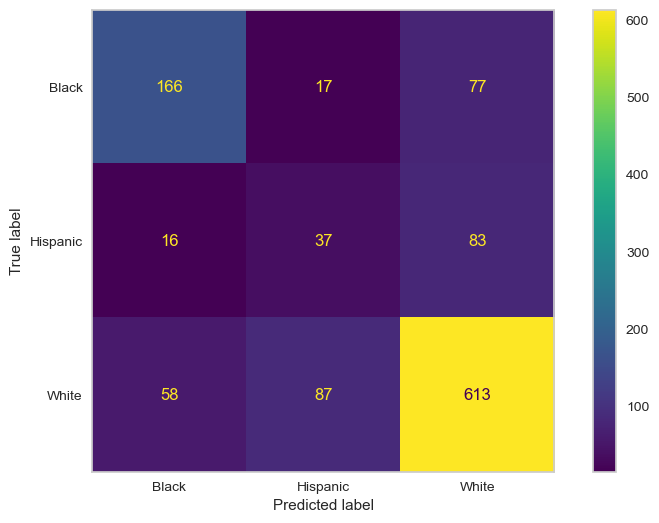

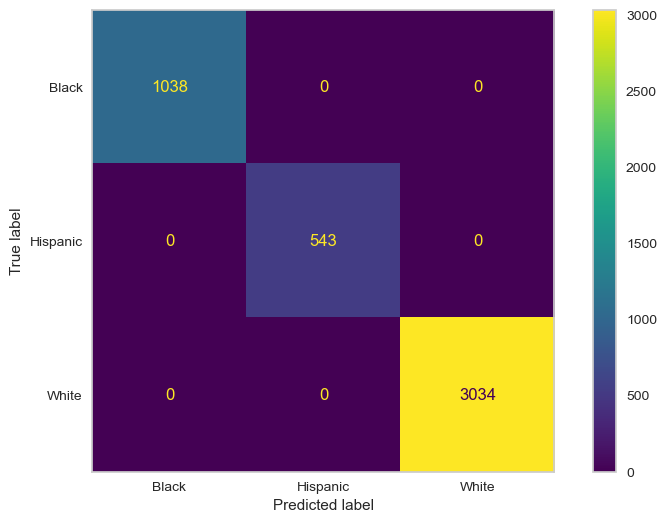

In [343]:
# check the evaluation metrics of DT pipe model

eval_metric(DT_pipe_model, X_train, y_train, X_test, y_test)

### DT Model Cross Validation

In [344]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.22
test_precision_Hispanic   0.23
test_recall_Hispanic      0.21
dtype: float64

### DT Model GridSearch

In [348]:
# reset the model
model = Pipeline(steps=operations)

# define the hyperparameters to be used in grid search
param_grid = {"DT_model__splitter":["best", "random"],
              "DT_model__max_features":[None, "auto", "log2", 10, 50],
              "DT_model__max_depth": [None, 2, 5, 10],
              "DT_model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "DT_model__min_samples_split": [2, 3, 5]}

In [351]:
# built DT grid model

DT_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_weighted',
                          cv=10,
                          n_jobs = -1)

In [352]:
# fit DT grid model on train data

DT_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'DT_model__max_depth': [None, 2, 5, 10],
                         'DT_model__max_features': [None, 'auto', 'log2', 10,
                                                    50],
                         'DT_model__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'DT_model__min_samples_split': [2, 3, 5],
                         'DT_model__splitter': ['best', 'random']},
             scoring='f1_weighted')

In [353]:
DT_grid_model.best_score_

0.6843139580944195

In [354]:
DT_grid_model.best_params_

{'DT_model__max_depth': None,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 3,
 'DT_model__splitter': 'best'}

In [355]:
DT_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('DT_model',
                 DecisionTreeClassifier(class_weight='balanced',
                                        min_samples_split=3,
                                        random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.67      0.63      0.65       260
    Hispanic       0.27      0.29      0.28       136
       White       0.79      0.80      0.79       758

    accuracy                           0.70      1154
   macro avg       0.58      0.57      0.57      1154
weighted avg       0.70      0.70      0.70      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.99      0.99      0.99      1038
    Hispanic       0.97      1.00      0.99       543
       White       1.00      0.99      1.00      3034

    accuracy                           0.99      4615
   macro avg       0.99      1.00      0.99      4615
weighted avg       0.99      0.99      0.99      4615



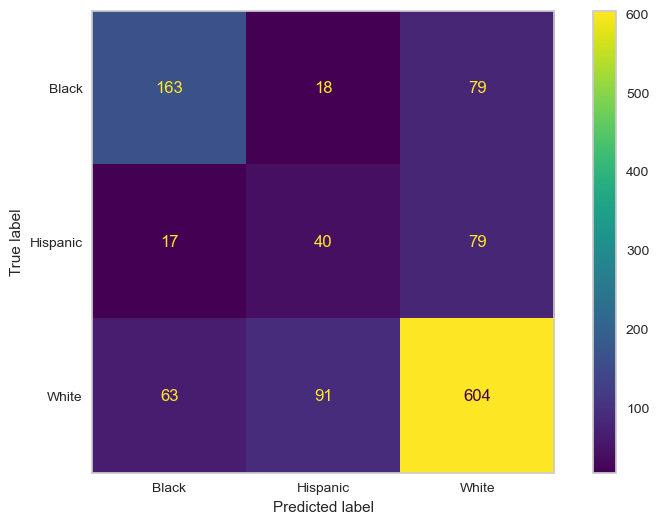

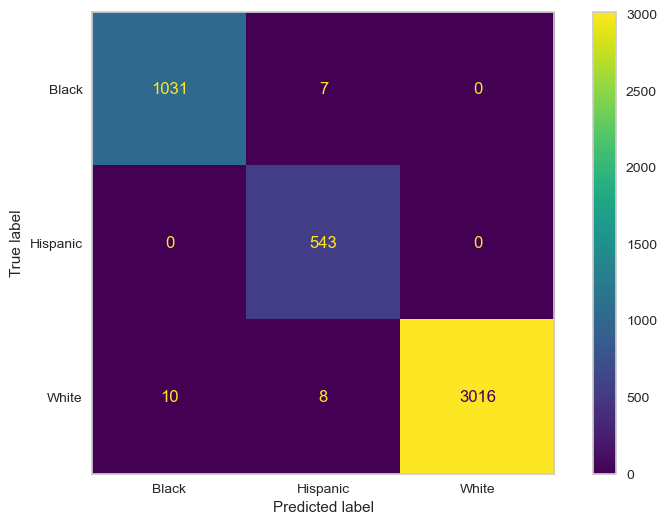

In [356]:
# check the evaluation metrics of DT grid model

eval_metric(DT_grid_model, X_train, y_train, X_test, y_test)

In [366]:
# predict on train and test data

y_pred_test = DT_grid_model.predict(X_test)
y_pred_train = DT_grid_model.predict(X_train)

In [367]:
# define model comparison variables

DT_AP = viz.score_["Hispanic"] # AP: average precision

DT_f1_test = f1_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
DT_f1_train = f1_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

DT_recall_test = recall_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
DT_recall_train = recall_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

DT_AP, DT_f1_test, DT_f1_train, DT_recall_test, DT_recall_train

(0.5112261287965737,
 array([0.28070175]),
 array([0.98637602]),
 array([0.29411765]),
 array([1.]))

### DT with Bagging

In [357]:
# built bagging DT pipe model

from sklearn.ensemble import BaggingClassifier

operations = [("OrdinalEncoder", column_trans), ("Bag_DT_model", BaggingClassifier(DecisionTreeClassifier(class_weight="balanced", random_state=42), n_jobs=-1, max_samples=1.0, n_estimators=10))]

Bag_DT_pipe_model = Pipeline(steps=operations)

Bag_DT_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('Bag_DT_model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                         random_state=42),
                                   n_jobs=-1))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.80      0.71      0.75       260
    Hispanic       0.33      0.13      0.19       136
       White       0.80      0.92      0.86       758

    accuracy                           0.78      1154
   macro avg       0.64      0.59      0.60      1154
weighted avg       0.74      0.78      0.75      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.99      0.98      0.99      1038
    Hispanic       1.00      0.97      0.98       543
       White       0.99      1.00      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.99      0.98      0.99      4615
weighted avg       0.99      0.99      0.99      4615



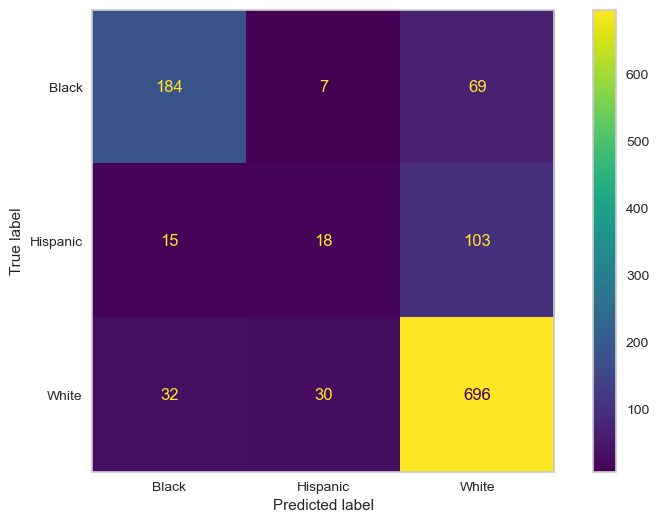

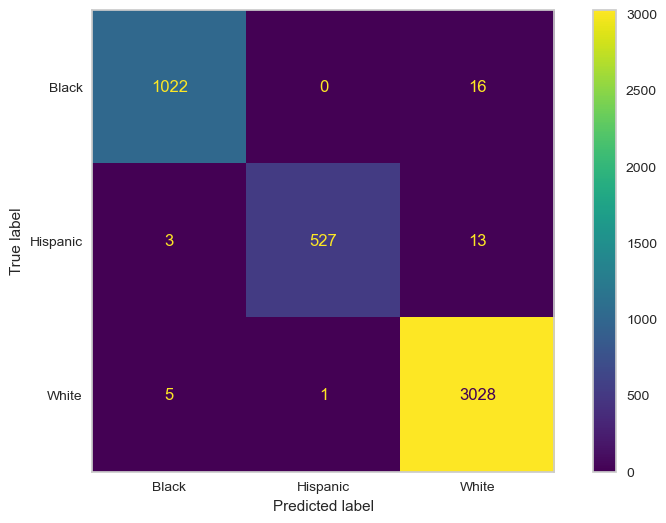

In [358]:
# check the evaluation metrics of Bagging DT pipe model

eval_metric(Bag_DT_pipe_model, X_train, y_train, X_test, y_test)

### Bagging_DT Model Cross validation

In [359]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.23
test_precision_Hispanic   0.44
test_recall_Hispanic      0.16
dtype: float64

### Baggin_DT Model GridSearch

In [388]:
# reset the model
model = Pipeline(steps=operations)

# define grid parameter
param_grid = {"Bag_DT_model__max_features":[10, 50],
              "Bag_DT_model__n_estimators": [2, 5]}

In [389]:
# built bagging DT grid model

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring=recall_Hispanic,
                          cv=5,
                          n_jobs = -1)

In [390]:
# fit the bagging DT grid model on train data

grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                                       ('Bag_DT_model',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                                random_state=42),
                                                          n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'Bag_DT_model__max_features': [10, 50],
                         'Bag_DT_model__n_estimators': [2, 5]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [391]:
grid_model.best_score_

0.33151546041454305

In [392]:
grid_model.best_params_

{'Bag_DT_model__max_features': 50, 'Bag_DT_model__n_estimators': 2}

TEST REPORT
              precision    recall  f1-score   support

       Black       0.49      0.75      0.59       260
    Hispanic       0.20      0.30      0.24       136
       White       0.82      0.61      0.70       758

    accuracy                           0.60      1154
   macro avg       0.51      0.55      0.51      1154
weighted avg       0.68      0.60      0.62      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.75      0.96      0.85      1038
    Hispanic       0.62      0.83      0.71       543
       White       0.98      0.83      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.78      0.87      0.82      4615
weighted avg       0.88      0.86      0.86      4615



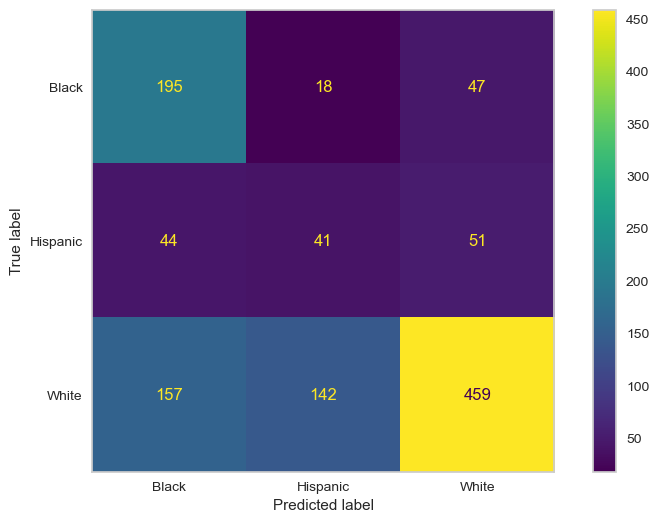

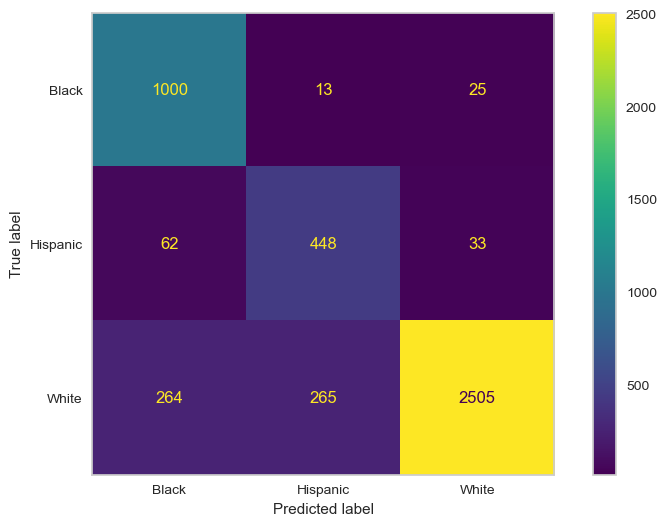

In [393]:
# check the evaluation metrics of bagging DT grid model

eval_metric(grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curves

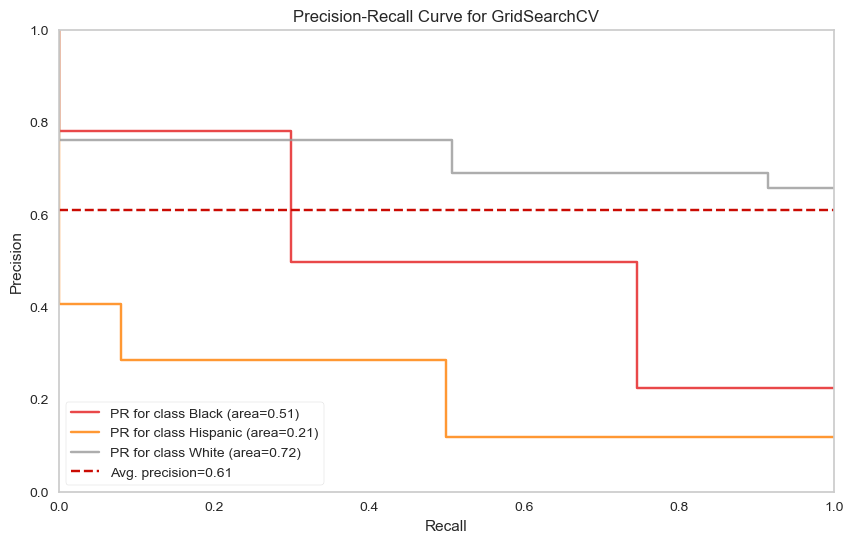

In [394]:
# precision-recall curve for grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes=["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [395]:
# predict on train and test data

y_pred_test = grid_model.predict(X_test)
y_pred_train = grid_model.predict(X_train)

In [396]:
# define model comparison variables

BAG_DT_AP = viz.score_["Hispanic"] # AP: average precision

BAG_DT_f1_test = f1_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
BAG_DT_f1_train = f1_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

BAG_DT_recall_test = recall_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
BAG_DT_recall_train = recall_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

BAG_DT_AP, BAG_DT_f1_test, BAG_DT_f1_train, BAG_DT_recall_test, BAG_DT_recall_train

(0.2111244082445814,
 array([0.24332344]),
 array([0.70606777]),
 array([0.30147059]),
 array([0.82504604]))

## 4. RF

### Vanilla RF Model

In [397]:
# built RF pipe model

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]

RF_pipe_model = Pipeline(steps=operations)

RF_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.91      0.68      0.78       260
    Hispanic       0.80      0.03      0.06       136
       White       0.78      0.98      0.87       758

    accuracy                           0.80      1154
   macro avg       0.83      0.56      0.57      1154
weighted avg       0.81      0.80      0.75      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



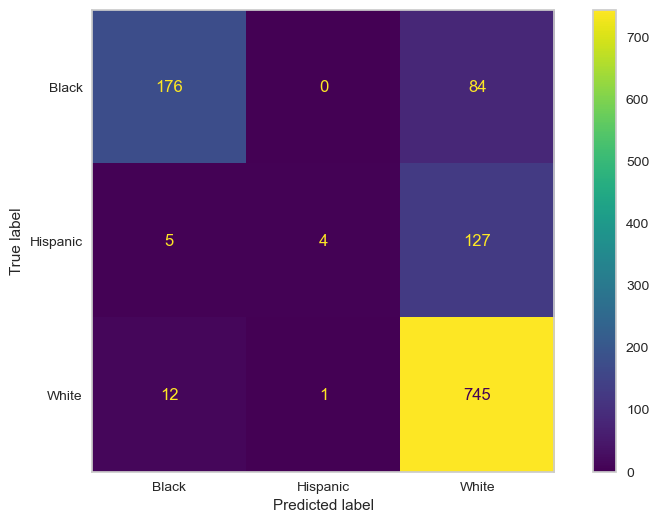

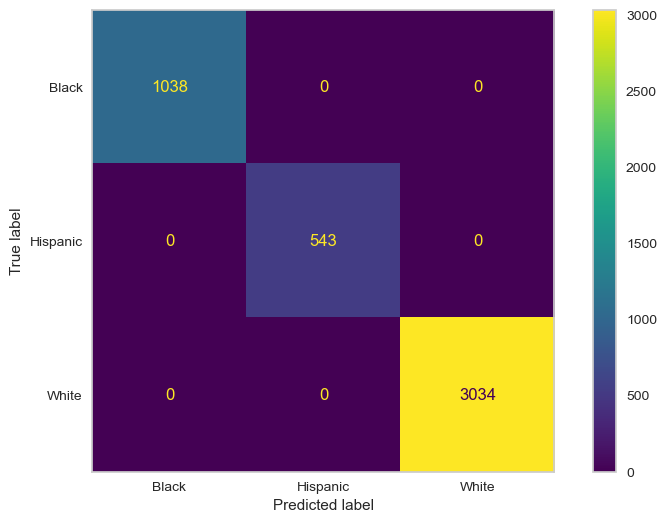

In [398]:
# check the evaluation metrics of RF pipe model

eval_metric(RF_pipe_model, X_train, y_train, X_test, y_test)

### RF Model Cross validation

In [399]:
model = Pipeline(operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.07
test_precision_Hispanic   0.82
test_recall_Hispanic      0.04
dtype: float64

### RF Model GridsearchCV

In [400]:
# reset the model
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]
model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"RF_model__n_estimators":[5, 10],
             "RF_model__criterion":["entropy","gini"],
              "RF_model__max_features":['auto',"log2"],
              "RF_model__max_depth": [10, 15],
             "RF_model__min_samples_split": [2, 5],
             "RF_model__min_samples_leaf" : [1, 5]}

In [401]:
# built RF grid model

RF_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring=recall_Hispanic,
                          cv=5,
                          n_jobs = -1)

In [402]:
# fit he RF grid model on train data

RF_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['entropy', 'gini'],
                         'RF_model__max_depth': [10, 15],
                         'RF_model__max_features': ['auto', 'log2'],
                         'RF_model__min_samples_leaf': [1, 5],
                         'RF_model__min_samples_split': [2, 5],
                         'RF_model__n_estimators': [5, 10]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [403]:
RF_grid_model.best_score_

0.3442405708460755

In [404]:
RF_grid_model.best_params_

{'RF_model__criterion': 'gini',
 'RF_model__max_depth': 10,
 'RF_model__max_features': 'log2',
 'RF_model__min_samples_leaf': 5,
 'RF_model__min_samples_split': 2,
 'RF_model__n_estimators': 5}

In [405]:
RF_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        max_features='log2', min_samples_leaf=5,
                                        n_estimators=5, random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.70      0.72      0.71       260
    Hispanic       0.28      0.32      0.30       136
       White       0.82      0.79      0.81       758

    accuracy                           0.72      1154
   macro avg       0.60      0.61      0.61      1154
weighted avg       0.73      0.72      0.73      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.84      0.90      0.87      1038
    Hispanic       0.59      0.77      0.67       543
       White       0.94      0.86      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.84      0.81      4615
weighted avg       0.88      0.86      0.87      4615



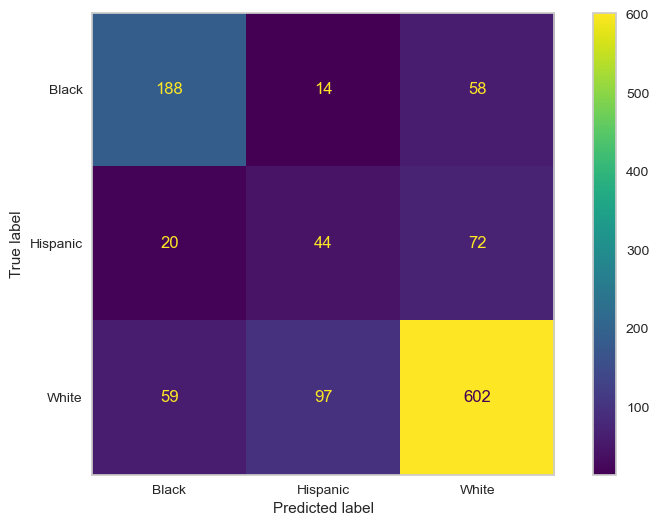

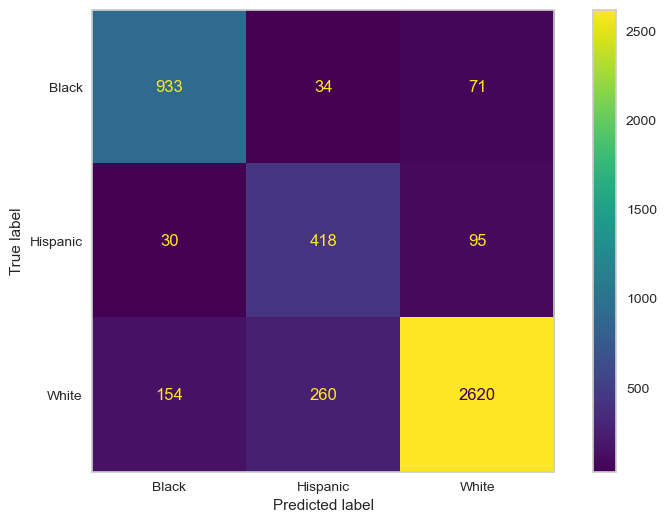

In [406]:
# check the evaluation metrics of RF grid model

eval_metric(RF_grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curves

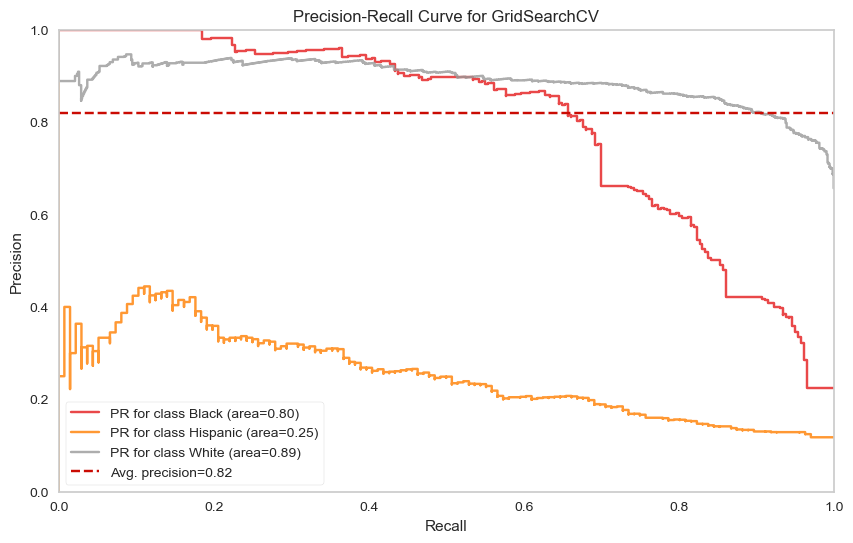

In [407]:
# precision-recall curve for RF grid model

from yellowbrick.classifier import PrecisionRecallCurve

model = RF_grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    classes=["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [408]:
# predict on train and test data

y_pred_test = RF_grid_model.predict(X_test)
y_pred_train = RF_grid_model.predict(X_train)

In [409]:
# define model comparison variables

RF_AP = viz.score_["Hispanic"]

RF_f1_test = f1_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
RF_f1_train = f1_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

RF_recall_test = recall_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
RF_recall_train = recall_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

RF_AP, RF_f1_test, RF_f1_train, RF_recall_test, RF_recall_train

(0.25117323771942346,
 array([0.3024055]),
 array([0.66613546]),
 array([0.32352941]),
 array([0.76979742]))

## 4. XGBoost

### Vanilla XGBoost Model

In [410]:
# built XGB pipe  model

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]

XGB_pipe_model = Pipeline(steps=operations)

In [411]:
# Since XGB model dosen't have class_weight parameter, we will use class_weight function during model fit phase

from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [412]:
# converting dataframe of class weights and check the weights

comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0   
Black     1.48    1038
Hispanic  2.83     543
White     0.51    3034
Name: 0, dtype: int64

In [413]:
# fit the XGB pipe model on train data

XGB_pipe_model.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.87      0.87      0.87       260
    Hispanic       0.42      0.66      0.52       136
       White       0.92      0.83      0.87       758

    accuracy                           0.82      1154
   macro avg       0.74      0.79      0.75      1154
weighted avg       0.85      0.82      0.83      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.90      0.94      0.92      1038
    Hispanic       0.57      0.86      0.68       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.88      4615



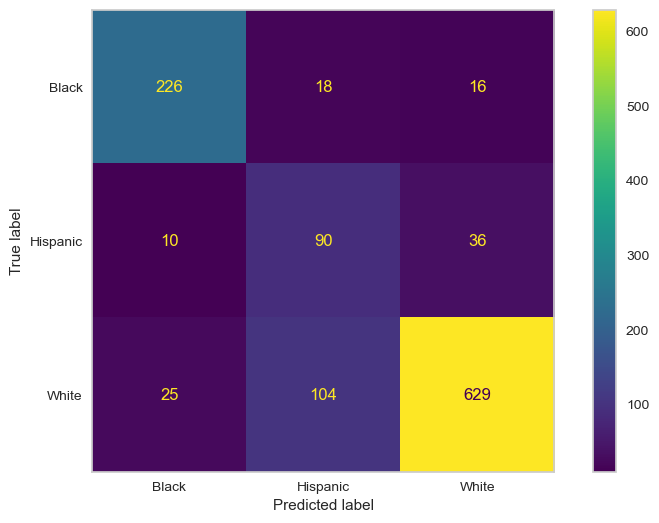

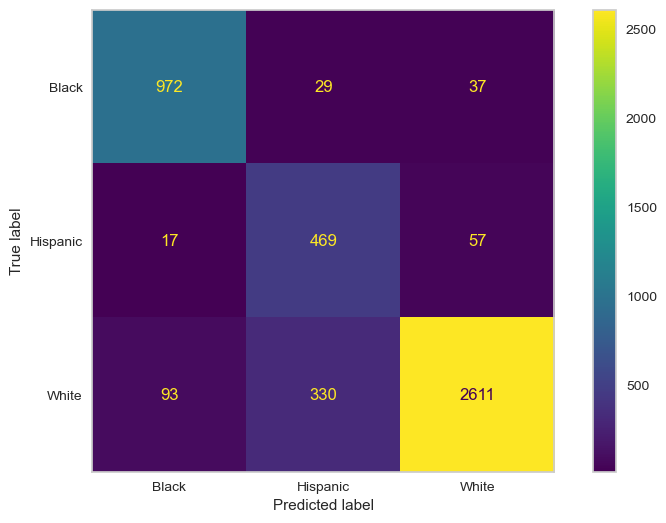

In [414]:
# check the evaluation metrics of XGB pipe model

eval_metric(XGB_pipe_model, X_train, y_train, X_test, y_test)

### XGB Model Cross Validation

In [415]:
operations = [("OrdinalEncoder", column_trans), ("XGB", XGBClassifier(random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10,
                        fit_params={"XGB__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.49
test_precision_Hispanic   0.41
test_recall_Hispanic      0.60
dtype: float64

### XGBoost Model GridsearchCV

In [416]:
# reset the model
operations = [("OrdinalEncoder", column_trans), ("XGB", XGBClassifier(random_state=42))]
model = Pipeline(steps=operations)

# define grid parameters
param_grid = {"XGB__n_estimators":[50, 100],
              "XGB__max_depth":[1,5],
              "XGB__learning_rate": [0.1, 0.2],
              "XGB__subsample":[0.5, 1],
              "XGB__colsample_bytree":[0.5, 1]}


In [417]:
# built XGB grid model

XGB_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1,
                              cv=5,
                              verbose = 2).fit(X_train, y_train, XGB__sample_weight=classes_weights)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [418]:
# fit the XGB grid model on train data

XGB_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                                       ('XGB',
                                        XGBClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'XGB__colsample_bytree': [0.5, 1],
                         'XGB__learning_rate': [0.1, 0.2],
                         'XGB__max_depth': [1, 5],
                         'XGB__n_estimators': [50, 100],
                         'XGB__subsample': [0.5, 1]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=2)

In [419]:
XGB_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('XGB',
                 XGBClassifier(colsample_bytree=0.5, learning_rate=0.2,
                               max_depth=5, objective='multi:softprob',
                               random_state=42))])

In [420]:
XGB_grid_model.best_score_

0.3351512062521237

In [421]:
XGB_grid_model.best_params_

{'XGB__colsample_bytree': 0.5,
 'XGB__learning_rate': 0.2,
 'XGB__max_depth': 5,
 'XGB__n_estimators': 100,
 'XGB__subsample': 1}

### Evaluating Precision-Recall Curves

In [122]:
# !pip install scikit-plot

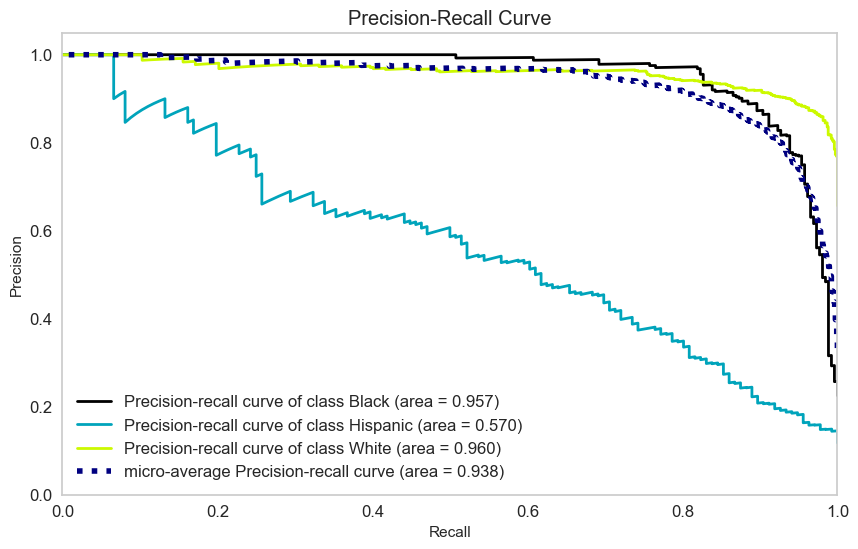

In [422]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

#reset the model with best hyperparameters
operations = [("OrdinalEncoder", column_trans), ("XGB", XGBClassifier(learning_rate=0.2, max_depth=5,
                            random_state=42, subsample=0.5, colsample_bytree=0.5))]


model = Pipeline(steps=operations)
model.fit(X_train, y_train, XGB__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test) # compute the y_pred_probe to use average precision calculation
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba) # plot precision_recall curve
plt.show()

In [423]:
# compute the dummies of y_test to use average precision calculation

y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5701054291666

In [424]:
# predict on train and test data

y_pred_test = XGB_grid_model.predict(X_test)
y_pred_train = XGB_grid_model.predict(X_train)

In [425]:
# define model comparison variables

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1]) # AP: average precision

xgb_f1_test = f1_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
xgb_f1_train = f1_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

xgb_recall_test = recall_score(y_test, y_pred_test, average=None, labels=["Hispanic"])
xgb_recall_train = recall_score(y_train, y_pred_train, average=None, labels=["Hispanic"])

xgb_AP, xgb_f1_test, xgb_f1_train, xgb_recall_test, xgb_recall_train

(0.5701054291666,
 array([0.46073298]),
 array([0.99815498]),
 array([0.32352941]),
 array([0.99631676]))

## Model Comparison

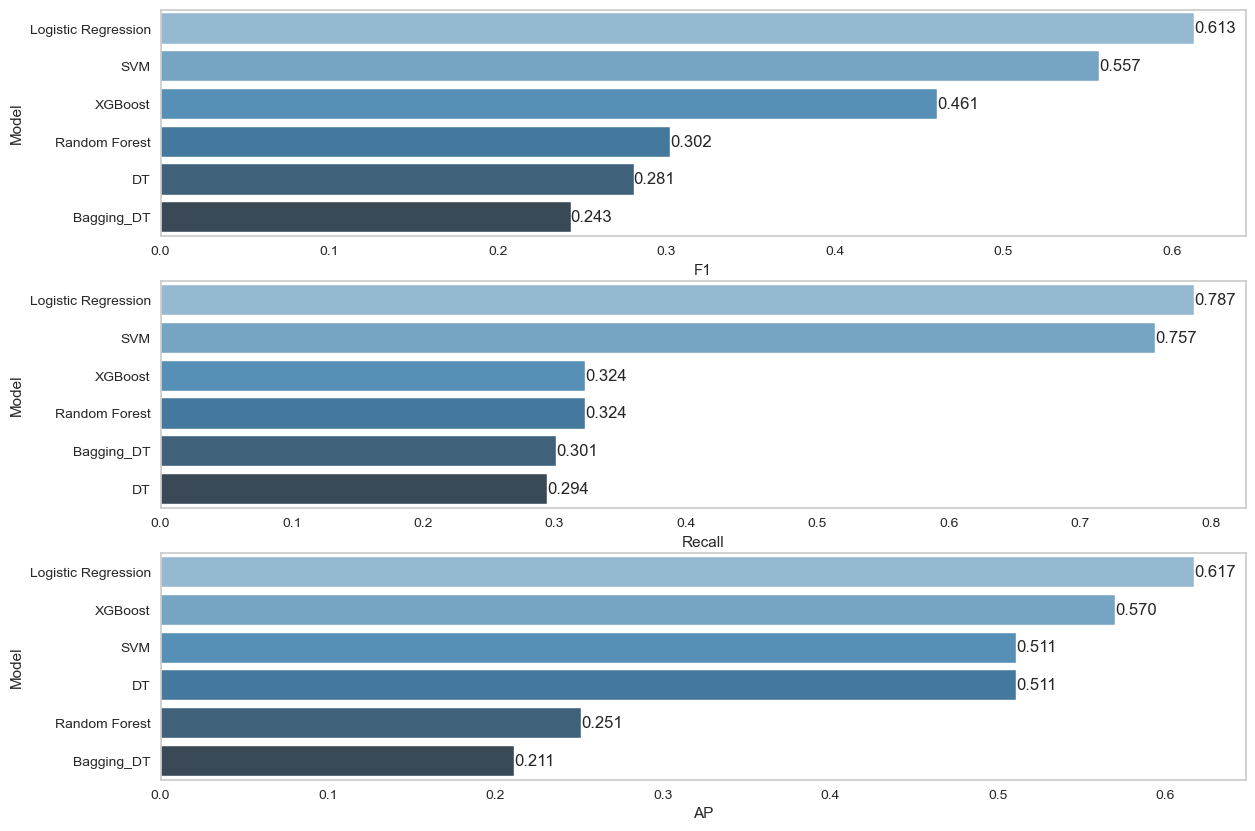

In [426]:
# Define a function to  compare models' performance

compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "DT", "Bagging_DT", "Random Forest", "XGBoost"],
                        "F1": [log_f1_test[0], SVC_f1_test[0], DT_f1_test[0], BAG_DT_f1_test[0], RF_f1_test[0], xgb_f1_test[0]],
                        "Recall": [log_recall_test[0], SVC_recall_test[0], DT_recall_test[0], BAG_DT_recall_test[0], RF_recall_test[0], xgb_recall_test[0]],
                        "AP": [log_AP, SVC_AP, DT_AP, BAG_DT_AP, RF_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

**Conclusion about model comparison:**

When we compare the models' performances it was concluded that Logistic Regression model has the highest performanse in terms of classification of Hispacincs.

So we will continue with Logistic Regression model during model deployment step.

##  Before the Deployment
Choose the model that works best based on your chosen metric

For final step, fit the best model with whole dataset to get better performance.

And your model ready to deploy, dump your model and scaler.

**Since the model performance of Logistic Regression to predict Hispanic correctly is the highest, we will built the final model with Logistic Regression.**

In [427]:
# Built final model

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations = [("OneHotEncoder",column_trans),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations)

In [428]:
# fit the final model on whole data (X, y)

final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [429]:
# checking the descriptive values of X

X.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                         5769.00         5769.00                5769.00   
mean                           247.25         1408.63                 328.07   
std                             37.46           78.30                  20.44   
min                            155.00         1146.00                 249.00   
25%                            220.00         1353.00                 314.00   
50%                            243.00         1412.00                 328.00   
75%                            272.00         1464.00                 342.00   
max                            451.00         1683.00                 393.00   

       anklecircumference  axillaheight  balloffootcircumference  \
count             5769.00       5769.00                  5769.00   
mean               225.20       1301.90                   244.41   
std                 15.97         71.26                    16.80   
min                156.00       1062.00                   186.00   
25%                214.00       1252.00                   233.00   
50%                225.00       1304.00                   245.00   
75%                235.00       1351.00                   256.00   
max                293.00       1553.00                   306.00   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count           5769.00            5769.00                    5769.00   
mean             195.12             399.71                     341.66   
std               13.38              30.12                      41.27   
min              151.00             283.00                     216.00   
25%              186.00             377.00                     312.00   
50%              196.00             404.00                     342.00   
75%              205.00             422.00                     370.00   
max              245.00             489.00                     490.00   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count           5769.00           5769.00             5769.00   
mean             274.90            491.45               72.34   
std               19.24             42.01                5.33   
min              197.00            357.00               55.00   
25%              262.00            461.00               68.00   
50%              274.00            493.00               73.00   
75%              288.00            520.00               76.00   
max              362.00            637.00               91.00   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count           5769.00                    5769.00             5769.00   
mean             324.96                     306.68              139.53   
std               17.05                      20.82                7.25   
min              267.00                     245.00              116.00   
25%              314.00                     292.00              134.00   
50%              326.00                     307.00              140.00   
75%              336.00                     321.00              145.00   
max              385.00                     390.00              166.00   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count               5769.00       5769.00        5769.00            5769.00   
mean                1022.06        242.23         872.11             610.45   
std                   75.95         26.41          54.06              33.12   
min                  737.00        168.00         656.00             479.00   
25%                  970.00        223.00         834.00             587.00   
50%                 1019.00        241.00         870.00             610.00   
75%                 1071.00        259.00         908.00             633.00   
max                 1341.00        349.00        1080.00             736.00   

       buttockpopliteallength  calfcircumference  

In [430]:
# get the mean values in X describe

mean_X = X.describe(include="all").loc["mean"]
mean_X

abdominalextensiondepthsitting    247.25
acromialheight                   1408.63
acromionradialelength             328.07
anklecircumference                225.20
axillaheight                     1301.90
balloffootcircumference           244.41
balloffootlength                  195.12
biacromialbreadth                 399.71
bicepscircumferenceflexed         341.66
bicristalbreadth                  274.90
bideltoidbreadth                  491.45
bimalleolarbreadth                 72.34
bitragionchinarc                  324.96
bitragionsubmandibulararc         306.68
bizygomaticbreadth                139.53
buttockcircumference             1022.06
buttockdepth                      242.23
buttockheight                     872.11
buttockkneelength                 610.45
buttockpopliteallength            498.33
calfcircumference                 386.32
cervicaleheight                  1479.95
chestbreadth                      283.23
chestcircumference               1024.21
chestdepth      

In [431]:
# convert mean_X to dataframe

pd.DataFrame(mean_X).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                         247.25        1408.63                328.07   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean             225.20      1301.90                  244.41           195.12   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean            399.71                    341.66           274.90   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean           491.45              72.34           324.96   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean                    306.68             139.53              1022.06   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean       242.23        872.11            610.45                 498.33   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean            386.32         1479.95       283.23            1024.21   

     chestdepth chestheight crotchheight crotchlengthomphalion  \
mean     252.32     1254.29       827.11                622.69   

     crotchlengthposterioromphalion earbreadth earlength earprotrusion  \
mean                         351.88      35.18     62.61         22.23   

     elbowrestheight eyeheightsitting footbreadthhorizontal footlength  \
mean          240.55           786.40                 98.92     263.51   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean                    339.46                     295.66   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean                553.10            467.90             1104.35       85.10   

     handcircumference handlength headbreadth headcircumference headlength  \
mean            204.22     189.57      152.04            570.42     196.64   

     heelanklecircumference heelbreadth hipbreadth hipbreadthsitting  \
mean                 333.27       70.83     348.93            386.42   

     iliocristaleheight interpupillarybreadth interscyei interscyeii  \
mean            1042.15                632.53     412.77      433.02   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean               476.67            541.38                         484.32   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean                  69.76                  406.94              119.60   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean            376.13                414.55                       1390.53   

     palmlength poplitealheight radialestylionlength shouldercircumference  \
mean     114.11          417.23               259.76               1131.21   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean              354.81         145.20        898.59                 868.36   

     sleeveoutseam    span stature suprasternaleheight tenthribheight  \
mean        578.01 1766.95 1716.94             1405.39        1101.63   

     thighcircumference thighclearance thumbtipreach tibialheight  \
mean             623.58         176.70        791.04       459.39   

     tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa  \
mean           129.58              884.66                       1632.47   

     waistbacklength waistbreadth waistcircumference waistdepth  \
mean          460.99       318.41             916.82     230.46   

     waistfrontlengthsitting waistheightomphalion weightkg wristcircumference  \
mean                  377.35              1033.59   800.98             169.31   

     wristheight Gender Component Branch SubjectsBirthLocation   Age  \
mean      831.33    NaN       NaN    NaN                   NaN 29.78   

     WritingPreference  
mean               NaN

In [432]:
# predict with final model using mean_X

final_model.predict(pd.DataFrame(mean_X).T)

array(['White'], dtype=object)

In [433]:
y[214]

'Hispanic'

In [434]:
X.loc[214]

abdominalextensiondepthsitting               273
acromialheight                              1414
acromionradialelength                        344
anklecircumference                           233
axillaheight                                1303
balloffootcircumference                      257
balloffootlength                             213
biacromialbreadth                            449
bicepscircumferenceflexed                    401
bicristalbreadth                             282
bideltoidbreadth                             549
bimalleolarbreadth                            77
bitragionchinarc                             345
bitragionsubmandibulararc                    333
bizygomaticbreadth                           146
buttockcircumference                        1053
buttockdepth                                 247
buttockheight                                923
buttockkneelength                            620
buttockpopliteallength                       492
calfcircumference   

In [435]:
# predict with final model using X[214]

final_model.predict(pd.DataFrame(X.loc[214]).T)

array(['Hispanic'], dtype=object)

In [436]:
# checking the matthews correlation coefficient of predicted and actual values

from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7895098045161052

In [437]:
# checking the cohen kappa correlation coefficient of predicted and actual values

from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.780781155537807

# SMOTE (Synthetic Minority Oversampling Technique)
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
# !pip install imblearn

In [438]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [439]:
# splitting the X and y as train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [440]:
X_train.shape

(4615, 99)

In [441]:
# built column transformer to apply OneHotEncoder and MinMaxScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [442]:
# apply OneHotEncoding and MinMaxScaling on X_train

X_train_ohe = column_trans.fit_transform(X_train)

### Over Sampling with SMOOTE

In [443]:
# built empty smoote object
over = SMOTE()

# fit smoote object on train data
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [444]:
# checking the shape of the X_over

X_over.shape

(9102, 232)

In [445]:
# checking the value counts of y_over

y_over.value_counts()

White       3034
Black       3034
Hispanic    3034
Name: DODRace, dtype: int64

### Under Sampling with RandomUnderSampler

In [446]:
# built empty RandomUnderSampler object
under = RandomUnderSampler()

# fit RandomUnderSampler object on train data
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [447]:
X_under.shape

(1629, 232)

In [448]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

### Apply Over and Under Sampling respectively, using sampling strategy

In [449]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [450]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [451]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [452]:
y_resampled_over.value_counts()  # there are 1000 Hispanic after over resampling

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [453]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [454]:
y_resampled_under.value_counts() # there are 2500 White after under resampling

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [455]:
X_resampled_under, y_resampled_under = under.fit_resample(X_resampled_over, y_resampled_over)

In [456]:
y_resampled_under.value_counts()  # there are 1000 Hispanic and 2500 White after applying over and under sampling respectively

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

### Over and Under Sampling with Pipeline

In [457]:
# define over and under sampling steps
operations = [("o", over),("u", under)]

# built a pipeline to apply over and under sampling together
pipeline = Pipeline(operations)

In [458]:
# fit_resample the pipeline on X_train_ohe and y_train

X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [459]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

## Logistic Model with Over and Under Sampling

In [460]:
# built log model with smoote pipeline contains onehotencoder, minmaxscaler, over and under sampling and logistic model objects

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations = [("OneHotEncoder", column_trans),("over", over),("under", under),("log", LogisticRegression(random_state=42, class_weight="balanced", max_iter=10000))]

log_smoote_pipeline = Pipeline(operations)

In [461]:
# fit smoote pipeline on train data

log_smoote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('over', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('under',
                 RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92       260
    Hispanic       0.50      0.78      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.82      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.87      0.83      4615
weighted avg       0.90      0.87      0.88      4615



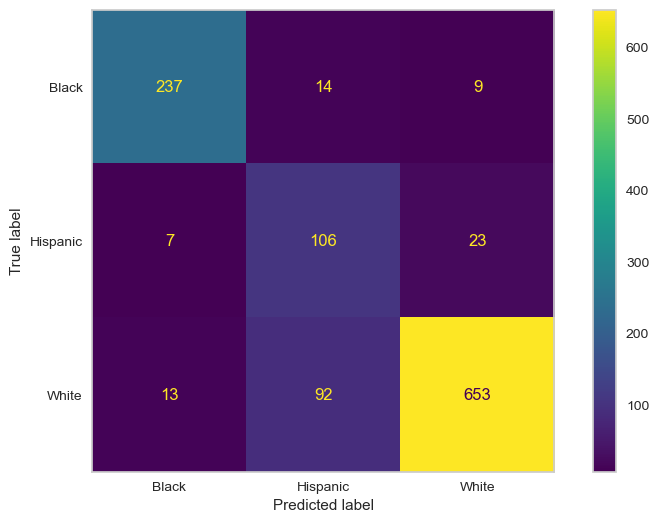

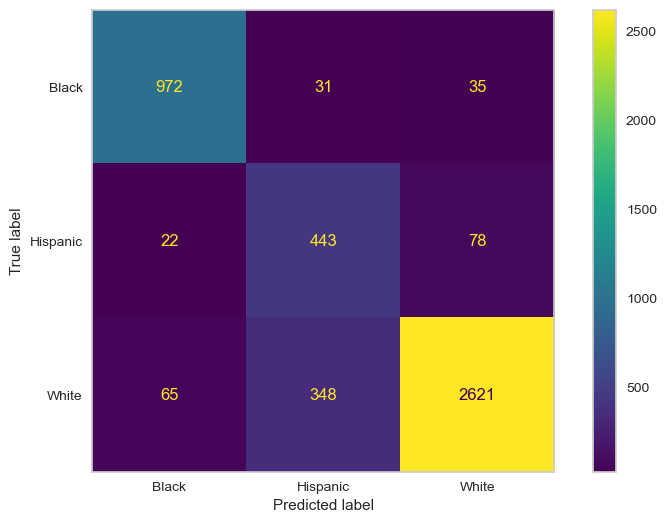

In [462]:
eval_metric(log_smoote_pipeline, X_train, y_train, X_test, y_test)

In [463]:
# cross validation with smoote log model

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.61
test_precision_Hispanic   0.51
test_recall_Hispanic      0.76
dtype: float64

## SVC Over/Under Sampling

In [464]:
# built SVC model with smoote pipeline contains onehotencoder, minmaxscaler, over and under sampling and SVC model objects

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations = [("OneHotEncoder", column_trans),("over", over),("under", under),("SVC", SVC(class_weight='balanced',max_iter=10000,
                                                                          random_state=42))]

SVC_smoote_pipeline = Pipeline(operations)

In [465]:
SVC_smoote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('over', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('under',
                 RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('SVC',
                 SVC(class_weight='balanced', max_iter=10000,
                     random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.47      0.76      0.58       136
       White       0.94      0.85      0.89       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.51      0.82      0.63       543
       White       0.95      0.85      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.80      0.86      0.82      4615
weighted avg       0.90      0.86      0.87      4615



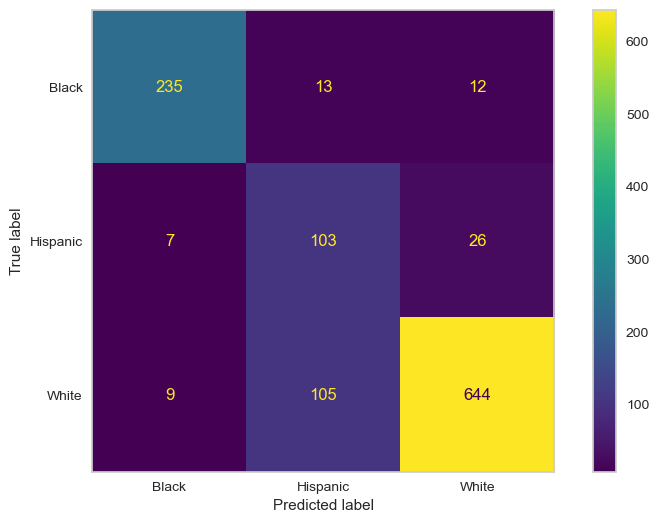

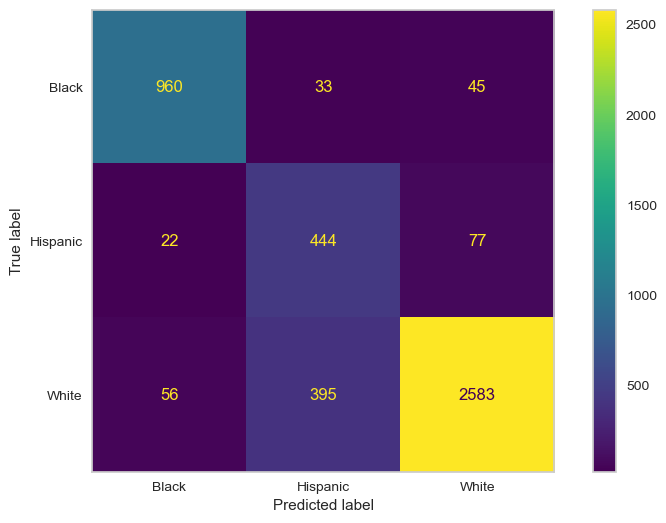

In [466]:
eval_metric(SVC_smoote_pipeline, X_train, y_train, X_test, y_test)

In [467]:
# cross validation with smoote SVC model

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.59
test_precision_Hispanic   0.48
test_recall_Hispanic      0.75
dtype: float64

## Xgboost Over/ Under Sampling

In [468]:
# built XGB model with smoote pipeline contains onehotencoder, minmaxscaler, over and under sampling and SVC model objects

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations = [("OneHotEncoder", column_trans),("over", over),("under", under),("XGB", XGBClassifier(random_state=42))]

XGB_smoote_pipeline = Pipeline(operations)

In [469]:
XGB_smoote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'Component', 'Branch', 'SubjectsBirthLocation',
       'WritingPreference'],
      dtype='object'))])),
                ('over', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('under',
                 RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('XGB',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.91      0.82      0.86       260
    Hispanic       0.68      0.48      0.56       136
       White       0.88      0.96      0.92       758

    accuracy                           0.87      1154
   macro avg       0.82      0.75      0.78      1154
weighted avg       0.86      0.87      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.94      0.89      0.92      1038
    Hispanic       0.81      0.59      0.69       543
       White       0.91      0.97      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.89      0.82      0.85      4615
weighted avg       0.90      0.91      0.90      4615



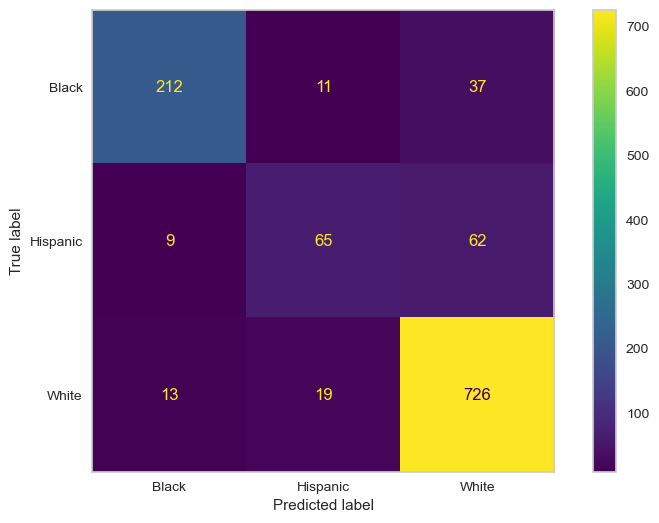

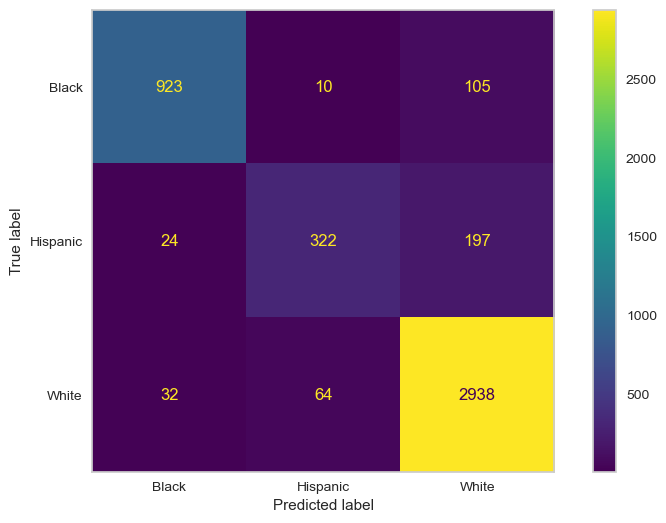

In [470]:
eval_metric(XGB_smoote_pipeline, X_train, y_train, X_test, y_test)

In [471]:
# cross validation with smoote SVC model

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.56
test_precision_Hispanic   0.70
test_recall_Hispanic      0.48
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [206]:
# !pip install shap

In [472]:
# define logistic model to use in SHAP and fit the model on train data

column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101)

model_shap.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=101)

In [473]:
features = column_trans_shap.get_feature_names_out(X_train.columns)
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__Component_Army National Guard',
       'onehotencoder__Component_Army Reserve',
       'onehotencoder__Component_Regular Army',
       'onehotencoder__Branch_Combat Arms',
       'onehotencoder__Branch_Combat Service Support',
       'onehotencoder__Branch_Combat Support',
       'onehotencoder__SubjectsBirthLocation_Alabama',
       'onehotencoder__SubjectsBirthLocation_Alaska',
       'onehotencoder__SubjectsBirthLocation_Antigua and Barbuda',
       'onehotencoder__SubjectsBirthLocation_Argentina',
       'onehotencoder__SubjectsBirthLocation_Arizona',
       'onehotencoder__SubjectsBirthLocation_Arkansas',
       'onehotencoder__SubjectsBirthLocation_Bahamas',
       'onehotencoder__SubjectsBirthLocation_Barbados',
       'onehotencoder__SubjectsBirthLocation_Belarus',
       'onehotencoder__SubjectsBirthLocation_Belgium',
       'onehotencoder__SubjectsBirthLocation_Belize',
       'onehote

## SHAP values for all data

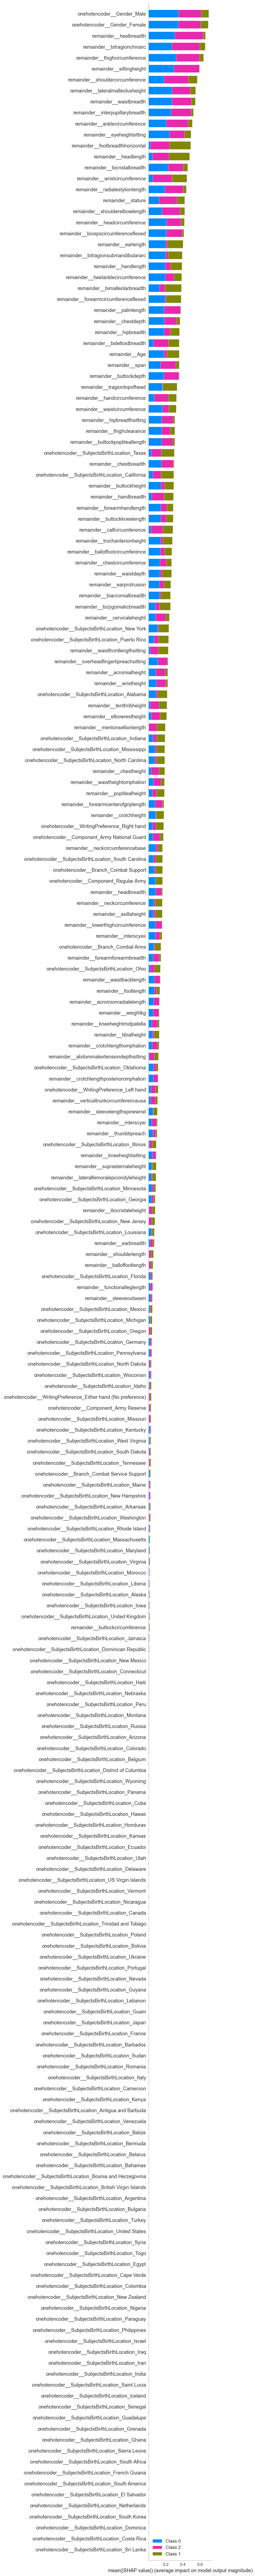

In [474]:
import shap
explainer = shap.LinearExplainer(model_shap, X_train_trans)
# start_index = 203
# end_index = 204
# shap_values = explainer.shap_values(X_test[start_index:end_index])
shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values, X_test_trans, max_display=300, feature_names = features, plot_type="bar")

In [475]:
model_shap.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [476]:
pd.DataFrame(model_shap.predict(X_test_trans)).value_counts()

White       684
Black       257
Hispanic    213
dtype: int64

In [477]:
shap_values

[array([[-2.73919912e-01, -2.76527023e-01,  4.02372816e-02, ...,
         -6.64850385e-02, -1.56821262e-01,  4.06567557e-01],
        [-2.73919912e-01, -2.76527023e-01, -5.79024296e-02, ...,
          2.28165579e-02, -9.48199479e-03,  3.31044172e-01],
        [ 4.86968732e-01,  4.91603597e-01, -5.79024296e-02, ...,
          7.19324359e-02,  1.19059634e-02, -4.65727542e-02],
        ...,
        [ 4.86968732e-01,  4.91603597e-01, -5.79024296e-02, ...,
          4.91158780e-04,  1.54492351e-01,  3.56218634e-01],
        [ 4.86968732e-01,  4.91603597e-01,  4.02372816e-02, ...,
          7.63975157e-02,  1.25975074e-01, -2.98317372e-01],
        [-2.73919912e-01, -2.76527023e-01, -5.79024296e-02, ...,
         -5.75548789e-02, -9.97867070e-02,  5.32439866e-01]]),
 array([[ 0.06775239,  0.06809194,  0.03085931, ..., -0.23415943,
         -0.03391519, -0.32972418],
        [ 0.06775239,  0.06809194, -0.0444073 , ...,  0.08035962,
         -0.00205064, -0.2684751 ],
        [-0.12044869, -0.

In [478]:
print(shap_values[2].shape)

(1154, 232)


## Feature Selection with SHAP

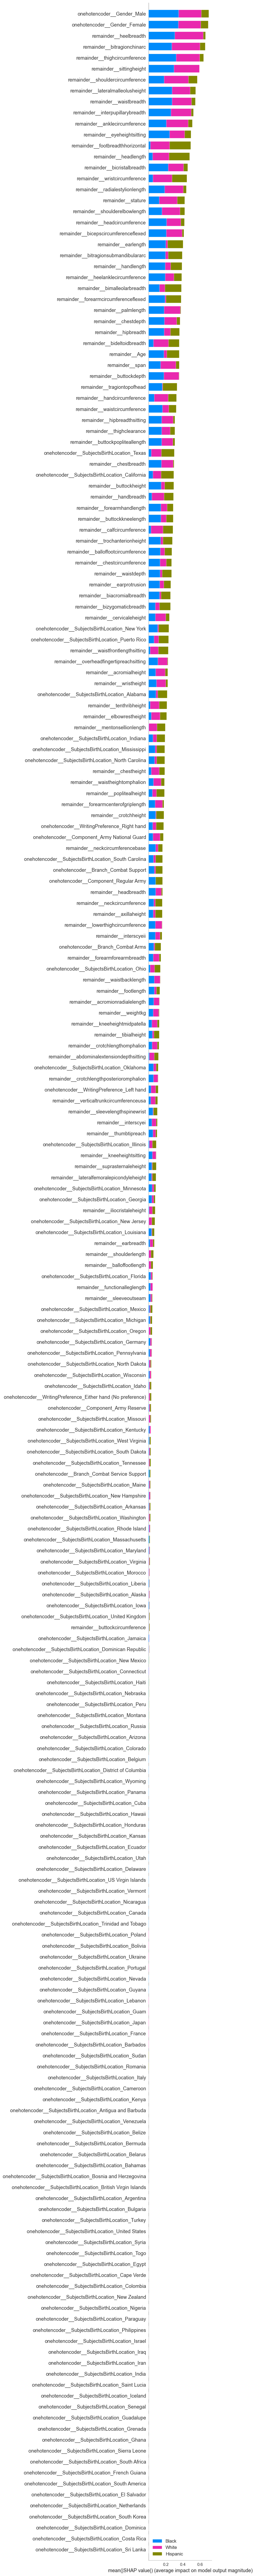

In [479]:
shap.summary_plot(shap_values, X_train_trans, max_display=300, feature_names = features, class_names=model_shap.classes_)

In [480]:
# According to the feature importance bar plot we can select the features below to determine Hispanic

hispanic = ['SubjectsBirthLocation', 'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [481]:
X2 = X[hispanic]
y = df.DODRace
X2.head()

SubjectsBirthLocation  handlength  forearmcircumferenceflexed  headlength  \
0          North Dakota         193                         299         206   
1              New York         195                         289         201   
2              New York         203                         357         202   
3             Wisconsin         194                         318         199   
4        North Carolina         218                         324         197   

   bitragionsubmandibulararc  footbreadthhorizontal  bimalleolarbreadth  \
0                        291                    101                  71   
1                        320                     98                  67   
2                        330                    103                  75   
3                        309                    106                  73   
4                        310                    111                  80   

   poplitealheight  waistdepth WritingPreference  tragiontopofhead  \
0              437         240        Right hand               140   
1              417         225         Left hand               120   
2              431         255         Left hand               125   
3              393         205        Right hand               127   
4              523         214        Right hand               122   

   bideltoidbreadth  neckcircumferencebase  biacromialbreadth  buttockheight  \
0               493                    436                401            882   
1               479                    420                394            870   
2               544                    434                427            901   
3               518                    446                401            821   
4               524                    430                435           1080   

   buttockkneelength  earlength  axillaheight  Age  
0                619         71          1347   41  
1                584         62          1293   35  
2                623         61          1327   42  
3                560         66          1239   31  
4                706         56          1478   21

In [482]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [483]:
X2.shape

(5769, 19)

In [484]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [485]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=42))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.65      0.82      0.72       260
    Hispanic       0.44      0.80      0.56       136
       White       0.91      0.69      0.79       758

    accuracy                           0.73      1154
   macro avg       0.67      0.77      0.69      1154
weighted avg       0.80      0.73      0.75      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.67      0.84      0.75      1038
    Hispanic       0.43      0.80      0.56       543
       White       0.92      0.69      0.79      3034

    accuracy                           0.74      4615
   macro avg       0.67      0.78      0.70      4615
weighted avg       0.81      0.74      0.75      4615



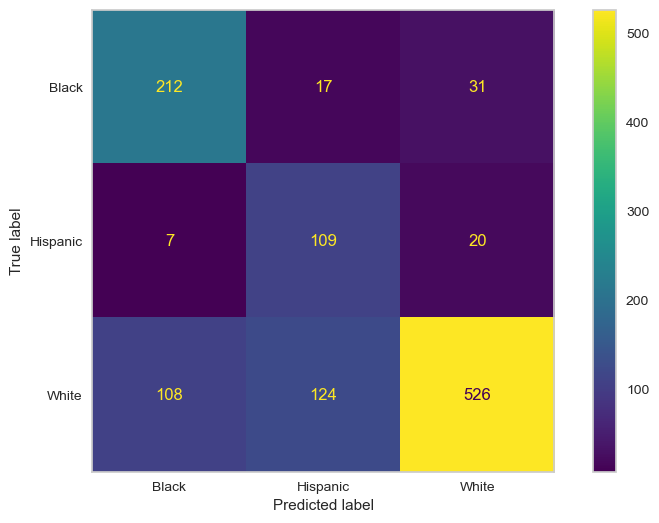

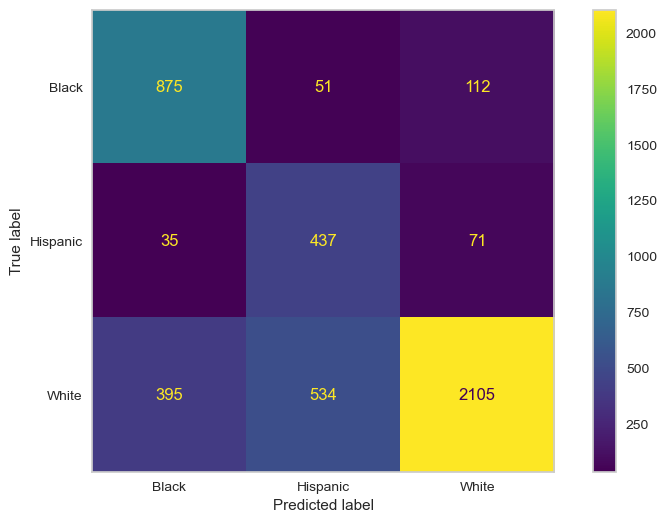

In [486]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

In [487]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.54
test_precision_Hispanic   0.42
test_recall_Hispanic      0.77
dtype: float64

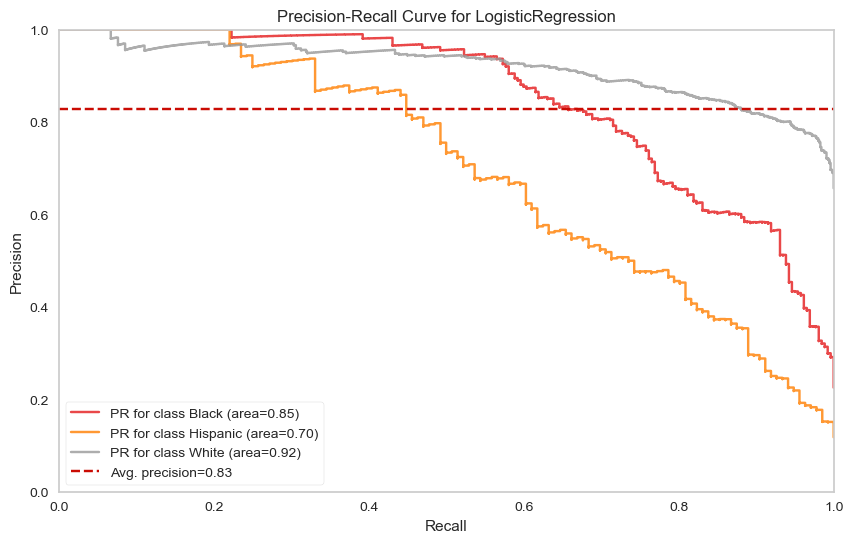

In [488]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

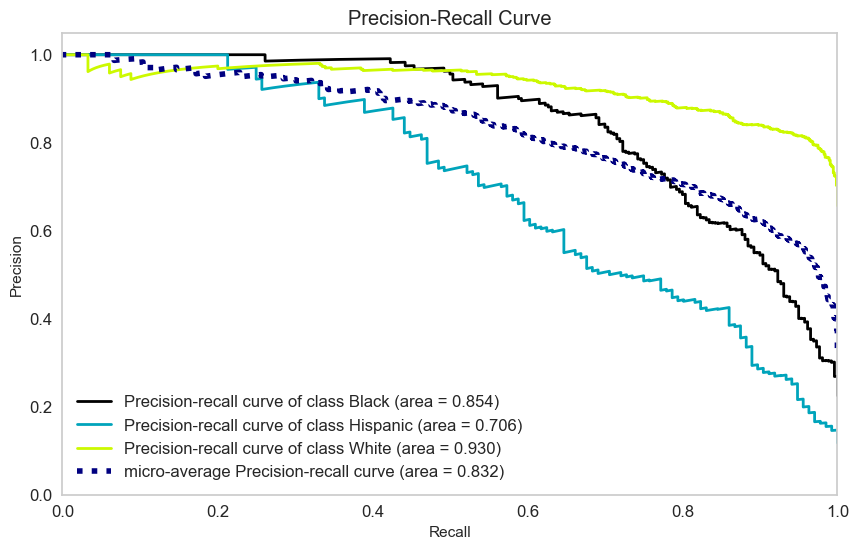

In [489]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___